# Data Cleaning and Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

In order to reduce the size of the initial file, the csv file containing all the car crash data was initially filtered out in Excel to only contain crashes from July 2019- July 2020. All other changes are shown here.

In [3]:
data = pd.read_csv('CSV Files/Chicago Car Crash Data 2019-20.zip',compression='zip')
data.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,c7e667807d86ff2e83da48267e1135680cad68c86eb00f...,JD150617,NaN,2/13/2020 16:30,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,ONE-WAY,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",2/13/2020 16:35,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,3,W,TERMINAL ST,1653,NaN,NaN,NaN,NaN,NaN,NaN,2,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,1.0,2.0,0.0,16,5,2,NaN,NaN,NaN
1,6d34286afc4dacd39b6ac31f8384d1b15b3af0d1e63311...,JD158240,NaN,2/20/2020 4:50,20,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,UNKNOWN,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",2/20/2020 4:52,NOT APPLICABLE,NOT APPLICABLE,3,W,TERMINAL ST,1653,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4,5,2,NaN,NaN,NaN
2,131903be80b7346ee13ffbb535294d66fb170a14221064...,JD157599,NaN,2/19/2020 12:50,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",2/19/2020 12:56,IMPROPER OVERTAKING/PASSING,NOT APPLICABLE,1,W,TERMINAL ST,1651,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,12,4,2,NaN,NaN,NaN
3,f5e0a26f33094ea48e6966d28c8bb368d80d7d0848f175...,JD146350,NaN,2/10/2020 7:50,5,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",2/10/2020 7:54,IMPROPER LANE USAGE,NOT APPLICABLE,8855,S,CHICAGO SKYWAY IB,423,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7,2,2,NaN,NaN,NaN
4,0564e565ebda939c88d5da6d613ac5789b702cbff5b874...,JC541936,NaN,12/10/2019 15:15,20,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDESTRIAN,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,$500 OR LESS,12/10/2019 15:20,DISTRACTION - FROM INSIDE VEHICLE,DISTRACTION - FROM INSIDE VEHICLE,3998,N,ASHLAND AVE,1922,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,15,3,12,41.954196,-87.669193,POINT (-87.669192620028 41.954196228965)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111351 entries, 0 to 111350
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                111351 non-null  object 
 1   RD_NO                          111351 non-null  object 
 2   CRASH_DATE_EST_I               8003 non-null    object 
 3   CRASH_DATE                     111351 non-null  object 
 4   POSTED_SPEED_LIMIT             111351 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         111351 non-null  object 
 6   DEVICE_CONDITION               111351 non-null  object 
 7   WEATHER_CONDITION              111351 non-null  object 
 8   LIGHTING_CONDITION             111351 non-null  object 
 9   FIRST_CRASH_TYPE               111351 non-null  object 
 10  TRAFFICWAY_TYPE                111351 non-null  object 
 11  LANE_CNT                       20 non-null      float64
 12  ALIGNMENT                     

A number of columns are present in the dataset that are not relevant to my analysis. There are quite a number of columns dealing with post-crash details such as injuries as well as other administrative details. There are also many columns with a high number of missing values.

## Removing Non-Pertinent Columns

A number of columns are present that are related to administrative details pertaining to the reporting and details of the incident. As we are only interesting in predicting causes of the crash, these columns are not relevant to the model's predictions and should be removed.

In [4]:
data[data['CRASH_DATE_EST_I'].notnull()]

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
6,0c76a4f80ee33ce544608a4d06c075db5551d62ce83653...,JC556405,Y,12/22/2019 6:00,25,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,Y,"OVER $1,500",12/22/2019 9:05,UNABLE TO DETERMINE,UNABLE TO DETERMINE,2002,W,BERTEAU AVE,1911,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6,1,12,41.957913,-87.679062,POINT (-87.679062414002 41.957913038009)
8,10eb246718c0c5ee1e6494237cac46efd0a3ce793a438c...,JC547713,Y,12/14/2019 20:00,25,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",12/15/2019 11:35,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3565,W,26TH ST,1032,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20,7,12,41.844276,-87.714722,POINT (-87.714722500033 41.844276406013)
31,4f8096693bb3d300132ceefd65796d29497ab66d4c4e91...,JD126426,Y,1/23/2020 22:09,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",OTHER OBJECT,ONE-WAY,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",1/23/2020 22:09,UNABLE TO DETERMINE,UNABLE TO DETERMINE,9428,S,RHODES AVE,633,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,22,5,1,41.722893,-87.610688,POINT (-87.610688187039 41.72289289198)
37,5bd65cfc5d5fca1f5aba2f437efe934ea858b39bfdc9bb...,JC377856,Y,8/4/2019 7:30,15,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",8/4/2019 9:50,UNABLE TO DETERMINE,NOT APPLICABLE,2048,W,WEBSTER AVE,1432,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7,1,8,41.921474,-87.679607,POINT (-87.679606521997 41.921473641976)
39,5c850db1f29e28af18e60c9391e0cdb40728dca4a9ebce...,JC458071,Y,10/1/2019 7:58,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",10/3/2019 7:30,UNABLE TO DETERMINE,UNABLE TO DETERMINE,600,W,DIVISION ST,1822,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7,3,10,41.903825,-87.643286,POINT (-87.643286359995 41.903825233976)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111293,3f6b8f6cb02fd2e8cf9d46852a095cfe33fef0b3c2bb37...,JD314446,Y,7/27/2020 12:00,20,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,ONE-WAY,NaN,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",7/29/2020 20:00,UNABLE TO DETERMINE,NOT APPLICABLE,2356,N,MASON AVE,2515,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12,2,7,41.923696,-87.774643,POINT (-87.774642714384 41.923695905331)
111302,04b707074ee65661ed4a39cc76da58b2aaf848ccb75b42...,JD313712,Y,7/29/

In [5]:
admin = ['CRASH_DATE_EST_I','REPORT_TYPE','DATE_POLICE_NOTIFIED','PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I']
data_wo_admin = data.drop(columns = admin,axis = 1)

In [6]:
data_wo_admin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111351 entries, 0 to 111350
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                111351 non-null  object 
 1   RD_NO                          111351 non-null  object 
 2   CRASH_DATE                     111351 non-null  object 
 3   POSTED_SPEED_LIMIT             111351 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         111351 non-null  object 
 5   DEVICE_CONDITION               111351 non-null  object 
 6   WEATHER_CONDITION              111351 non-null  object 
 7   LIGHTING_CONDITION             111351 non-null  object 
 8   FIRST_CRASH_TYPE               111351 non-null  object 
 9   TRAFFICWAY_TYPE                111351 non-null  object 
 10  LANE_CNT                       20 non-null      float64
 11  ALIGNMENT                      111351 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [7]:
data_wo_admin[data_wo_admin['LANE_CNT'].notnull()]

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
582,111f4bc6f4e8781f355493e263b1202ae75b7c28808db0...,JC364167,7/20/2019 13:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE OPPOSITE DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),2.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,2700,W,WABANSIA AVE,1421,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,4.0,0.0,13,7,7,41.912181,-87.694657,POINT (-87.69465726698 41.912181158989)
3906,a517b8959579e0e96196b7dff57a061b6b57b9f40ee151...,JD316959,7/31/2020 23:51,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DARKNESS,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),2.0,STRAIGHT AND LEVEL,DRY,WORN SURFACE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,$500 OR LESS,PHYSICAL CONDITION OF DRIVER,UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN...,350,W,BELMONT AVE,1925,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,23,6,7,41.940297,-87.639074,POINT (-87.639074222297 41.940297326019)
11845,092b8dcfa168fc3e1cbfb38959e5649b28e746fdbb58e7...,JC392642,8/14/2019 9:20,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,ONE-WAY,3.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,NOT APPLICABLE,195,N,WELLS ST,122,Y,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,2.0,0.0,9,4,8,41.885620,-87.633780,POINT (-87.633779783837 41.885619573257)
22772,244199a3d5871509c99a91f82ec628a07b1df43c86f570...,JC425387,9/8/2019 17:00,45,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,SIDESWIPE SAME DIRECTION,NOT DIVIDED,2.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",IMPROPER LANE USAGE,IMPROPER LANE USAGE,2301,S,LAKE SHORE DR W,132,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,17,1,9,41.851107,-87.612867,POINT (-87.612866632544 41.85110748019)
35834,4490bdc08dd527e395f6f2aac1c35bbfeb7f2015dea3fd...,JC553196,12/19/2019 18:30,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,ONE-WAY,2.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,N,NaN,NaN,"OVER $1,500",IMPROPER OVERTAKING/PASSING,NOT APPLICABLE,175,E,DELAWARE PL,1833,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18,5,12,41.899117,-87.622956,POINT (-87.622955665906 41.899117396911)
35931,44d1c7a6c028923c6d8826ffc4237c2f8e4fa54e164482...,JD147833,10/9/2019 14:00,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,OTHER OBJECT,NOT DIVIDED,4.0,STRAIGHT AND LEVEL,WET,"RUT, HOLES",NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",ROAD ENGINEERING/SURFACE/MARKING DEFECTS,ROAD ENGINEERING/SURFACE/MARKING DEFECTS,701,N,SACRAMENTO BLVD,1221,NaN,NaN,NaN,NaN,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,4,10,41.893797,-87.702004,POINT (-87.702004213035 41.893797229945)
38204,4a7012416b14fe936435c52fc4ebb2b73c6d1d8c0b2d34...,JC474594,10/16/2019 8:45,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,2.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,9501,S,STONY ISLAND AVE,431,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,8,4,10,41.722244,-87.584969,POINT (-87.584969118484 41.722243814964)
47331,6109d26bcf1f1

In [8]:
data_wo_admin = data_wo_admin.drop(['LANE_CNT'], axis = 1)
data_wo_admin.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,c7e667807d86ff2e83da48267e1135680cad68c86eb00f...,JD150617,2/13/2020 16:30,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,ONE-WAY,STRAIGHT AND LEVEL,WET,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,3,W,TERMINAL ST,1653,NaN,NaN,NaN,NaN,2,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,1.0,2.0,0.0,16,5,2,NaN,NaN,NaN
1,6d34286afc4dacd39b6ac31f8384d1b15b3af0d1e63311...,JD158240,2/20/2020 4:50,20,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,ONE-WAY,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",NOT APPLICABLE,NOT APPLICABLE,3,W,TERMINAL ST,1653,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4,5,2,NaN,NaN,NaN
2,131903be80b7346ee13ffbb535294d66fb170a14221064...,JD157599,2/19/2020 12:50,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",IMPROPER OVERTAKING/PASSING,NOT APPLICABLE,1,W,TERMINAL ST,1651,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,12,4,2,NaN,NaN,NaN
3,f5e0a26f33094ea48e6966d28c8bb368d80d7d0848f175...,JD146350,2/10/2020 7:50,5,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",IMPROPER LANE USAGE,NOT APPLICABLE,8855,S,CHICAGO SKYWAY IB,423,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7,2,2,NaN,NaN,NaN
4,0564e565ebda939c88d5da6d613ac5789b702cbff5b874...,JC541936,12/10/2019 15:15,20,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDESTRIAN,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,$500 OR LESS,DISTRACTION - FROM INSIDE VEHICLE,DISTRACTION - FROM INSIDE VEHICLE,3998,N,ASHLAND AVE,1922,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,15,3,12,41.954196,-87.669193,POINT (-87.669192620028 41.954196228965)


## Dealing with Binary Columns

In [9]:
data_wo_admin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111351 entries, 0 to 111350
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                111351 non-null  object 
 1   RD_NO                          111351 non-null  object 
 2   CRASH_DATE                     111351 non-null  object 
 3   POSTED_SPEED_LIMIT             111351 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         111351 non-null  object 
 5   DEVICE_CONDITION               111351 non-null  object 
 6   WEATHER_CONDITION              111351 non-null  object 
 7   LIGHTING_CONDITION             111351 non-null  object 
 8   FIRST_CRASH_TYPE               111351 non-null  object 
 9   TRAFFICWAY_TYPE                111351 non-null  object 
 10  ALIGNMENT                      111351 non-null  object 
 11  ROADWAY_SURFACE_COND           111351 non-null  object 
 12  ROAD_DEFECT                   

In [10]:
data_wo_admin[data_wo_admin['INTERSECTION_RELATED_I'].notnull()]

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
5,074f50577888fe85727b97fe0010aa708efe985ae1effd...,JC539018,12/8/2019 8:14,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,NaN,Y,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,7501,S,STONY ISLAND AVE,411,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,8,1,12,41.758724,-87.585591,POINT (-87.585590902031 41.758723759994)
12,1d191ccd52478ee352b4f9326a406c7a311ce140f19fff...,JC539234,12/8/2019 12:30,35,TRAFFIC SIGNAL,UNKNOWN,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,Y,NaN,NaN,"$501 - $1,500",FOLLOWING TOO CLOSELY,UNABLE TO DETERMINE,3003,W,ADDISON ST,1733,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,12,1,12,41.946544,-87.703072,POINT (-87.703072315044 41.946544135964)
18,23ff25e315738ed727aab7ca4628445c65da5753d8c973...,JD112768,1/12/2020 2:45,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SLEET/HAIL,"DARKNESS, LIGHTED ROAD",REAR END,FOUR WAY,STRAIGHT AND LEVEL,WET,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",WEATHER,FOLLOWING TOO CLOSELY,800,W,GRAND AVE,1214,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2,1,1,41.891294,-87.647681,POINT (-87.647680593026 41.891293712961)
19,2a31aa10348499dc7aa43dab8200ea9352e0d2fefda621...,JC487423,10/26/2019 16:50,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,FOUR WAY,STRAIGHT AND LEVEL,WET,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,FAILING TO YIELD RIGHT-OF-WAY,8301,S,CICERO AVE,834,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,5.0,0.0,16,7,10,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
28,497c0a0a9c0f14317a059ded603352f8df611f78ad954c...,JC503624,11/8/2019 18:50,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,NaN,NaN,"$501 - $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,531,W,BELMONT AVE,1934,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18,6,11,41.939957,-87.643129,POINT (-87.643128760973 41.939956717959)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111323,cb353d0798f4facbf63cb1686bfa9392bd736974bfb0e2...,JD309673,7/25/2020 15:45,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,HEAD ON,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT ON GRADE,DRY,SHOULDER DEFECT,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,3400,W,OGDEN AVE,1021,NaN,NaN,NaN,NaN,2,INCAPACITATING INJURY,2.0,0.0,2.0,0.0,0.0,1.0,0.0,15,7,7,41.856351,-87.710375,POINT (-87.710375249191 41.856350538058)
111333,062e05bc2a5cc08880afa4128edb741e832ef92a0e85a6...,JD314394,7/29/2020 18:40,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",DISTRACTION - FROM INSIDE VEHICLE,DISREGARDING TRAFFIC SIGNALS,1600,W,79TH ST,611,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.

In [11]:
yes_cols = ['INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORKERS_PRESENT_I']
for col in yes_cols:
    print(data_wo_admin[col].value_counts())
    print('Number of nulls:' , data_wo_admin[col].isnull().sum())
    print("")

Y    25848
N     1385
Name: INTERSECTION_RELATED_I, dtype: int64
Number of nulls: 84118

Y    5054
N     487
Name: NOT_RIGHT_OF_WAY_I, dtype: int64
Number of nulls: 105810

Y    32660
N     1540
Name: HIT_AND_RUN_I, dtype: int64
Number of nulls: 77151

Y    242
N    103
Name: DOORING_I, dtype: int64
Number of nulls: 111006

Y    440
N    116
Name: WORK_ZONE_I, dtype: int64
Number of nulls: 110795

Y    149
N     17
Name: WORKERS_PRESENT_I, dtype: int64
Number of nulls: 111185



It appears as though columns that are succeeded with a 'I' are meant to represent columns that answered with solely a Y or N. However, a large number of the entries within these columns are missing values. I will switch Y to be represented as 1 and N to be represented as 0. All nulls will then be filled with 0.

In [12]:
# Replace all Ys with 1 and all other entries with 0
for col in yes_cols:
    data_wo_admin[col] = data_wo_admin[col].map(lambda x: 1 if x =='Y' else 0)
    print(data_wo_admin[col].value_counts())
    print('Number of nulls:' , data_wo_admin[col].isnull().sum())
    print("")

0    85503
1    25848
Name: INTERSECTION_RELATED_I, dtype: int64
Number of nulls: 0

0    106297
1      5054
Name: NOT_RIGHT_OF_WAY_I, dtype: int64
Number of nulls: 0

0    78691
1    32660
Name: HIT_AND_RUN_I, dtype: int64
Number of nulls: 0

0    111109
1       242
Name: DOORING_I, dtype: int64
Number of nulls: 0

0    110911
1       440
Name: WORK_ZONE_I, dtype: int64
Number of nulls: 0

0    111202
1       149
Name: WORKERS_PRESENT_I, dtype: int64
Number of nulls: 0



In [13]:
data_wo_admin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111351 entries, 0 to 111350
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                111351 non-null  object 
 1   RD_NO                          111351 non-null  object 
 2   CRASH_DATE                     111351 non-null  object 
 3   POSTED_SPEED_LIMIT             111351 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         111351 non-null  object 
 5   DEVICE_CONDITION               111351 non-null  object 
 6   WEATHER_CONDITION              111351 non-null  object 
 7   LIGHTING_CONDITION             111351 non-null  object 
 8   FIRST_CRASH_TYPE               111351 non-null  object 
 9   TRAFFICWAY_TYPE                111351 non-null  object 
 10  ALIGNMENT                      111351 non-null  object 
 11  ROADWAY_SURFACE_COND           111351 non-null  object 
 12  ROAD_DEFECT                   

In [14]:
data_wo_admin[data_wo_admin['WORK_ZONE_TYPE'].notnull()]

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
44,6448eca5b17fceacc9cdfc012b0792b71d8cbb04bc790e...,JC495770,11/2/2019 12:02,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,0,0,0,"OVER $1,500",FOLLOWING TOO CLOSELY,ROAD CONSTRUCTION/MAINTENANCE,4740,W,FOSTER AVE,1712,0,1,CONSTRUCTION,1,3,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,12,7,11,41.975459,-87.747328,POINT (-87.747327999047 41.975458552982)
233,a61cf24d3bd1aac34fefb568ad313018b08f30d93a7c2f...,JD163026,2/24/2020 11:25,30,OTHER REG. SIGN,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,OTHER OBJECT,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,OTHER,NO INJURY / DRIVE AWAY,1,0,0,"OVER $1,500",ROAD CONSTRUCTION/MAINTENANCE,NOT APPLICABLE,4032,W,IRVING PARK RD,1722,0,1,UTILITY,1,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11,2,2,41.953750,-87.728490,POINT (-87.728489892005 41.953750193958)
423,d1e4060ce763fab162118045cdbfdbf044743a4eebc814...,JD229708,5/11/2020 14:00,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,0,0,0,"$501 - $1,500",IMPROPER BACKING,NOT APPLICABLE,514,W,OHARE ST,1654,0,1,UTILITY,0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,2,5,NaN,NaN,NaN
502,fc0725fe08c4a26cc0787f3c6b714cc15ffabc1889a12a...,JC543925,12/12/2019 9:38,20,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,0,0,0,$500 OR LESS,UNABLE TO DETERMINE,UNABLE TO DETERMINE,2600,W,IRVING PARK RD,1911,0,1,CONSTRUCTION,1,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,9,5,12,41.954106,-87.693290,POINT (-87.693290369008 41.954105716988)
538,c57f8570f632decdcb88d7ed158117277fb24bef248109...,JC402377,8/22/2019 5:30,45,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,0,0,0,"OVER $1,500",FOLLOWING TOO CLOSELY,FAILING TO REDUCE SPEED TO AVOID CRASH,12300,W,IRVING PARK RD,1654,0,1,CONSTRUCTION,0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5,5,8,41.958987,-87.933994,POINT (-87.933993928974 41.958986950953)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110578,fe6dfd031db1aa04ee1081b99cf596dc1d486dc44756ab...,JC343803,7/11/2019 8:15,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,0,0,0,$500 OR LESS,NOT APPLICABLE,NOT APPLICABLE,8300,S,WASHTENAW AVE,835,0,1,CONSTRUCTION,1,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8,5,7,41.742677,-87.689983,POINT (-87.68998319459 41.742677240257)
110589,fe73c37b0883621c0943802e92db9939304e9416d13d8b...,JC403918,8/18/2019 5:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,OTHER OBJECT,ONE-WAY,STRAIGHT AND LEVEL,DRY,"RUT, HOLES",NO INJURY / DRIVE AWAY,0,0,0,"$501 - $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,9,E,WALTON ST,1833,0,1,CONSTRUCTION,0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5,1,8,41.899833,-87.627885,POINT (-87.62788512496 41.899833401544)
110751,fed2772aff4f81d22884c9df0c1eff5539675c96016538...,JC460054,1

In [15]:
data_wo_admin['WORK_ZONE_TYPE'].value_counts()

CONSTRUCTION    299
UNKNOWN          65
MAINTENANCE      43
UTILITY          33
Name: WORK_ZONE_TYPE, dtype: int64

Work Zone Type does not pertain to many entries in this dataset. As such, it is better suited to simply drop the column.

In [16]:
data_wo_admin = data_wo_admin.drop(['WORK_ZONE_TYPE'], axis = 1)
data_wo_admin.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,DOORING_I,WORK_ZONE_I,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,c7e667807d86ff2e83da48267e1135680cad68c86eb00f...,JD150617,2/13/2020 16:30,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,ONE-WAY,STRAIGHT AND LEVEL,WET,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,0,0,0,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,3,W,TERMINAL ST,1653,0,0,0,2,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,1.0,2.0,0.0,16,5,2,NaN,NaN,NaN
1,6d34286afc4dacd39b6ac31f8384d1b15b3af0d1e63311...,JD158240,2/20/2020 4:50,20,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,ONE-WAY,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,0,0,0,"$501 - $1,500",NOT APPLICABLE,NOT APPLICABLE,3,W,TERMINAL ST,1653,0,0,0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4,5,2,NaN,NaN,NaN
2,131903be80b7346ee13ffbb535294d66fb170a14221064...,JD157599,2/19/2020 12:50,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,0,0,0,"OVER $1,500",IMPROPER OVERTAKING/PASSING,NOT APPLICABLE,1,W,TERMINAL ST,1651,0,0,0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,12,4,2,NaN,NaN,NaN
3,f5e0a26f33094ea48e6966d28c8bb368d80d7d0848f175...,JD146350,2/10/2020 7:50,5,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,0,0,0,"OVER $1,500",IMPROPER LANE USAGE,NOT APPLICABLE,8855,S,CHICAGO SKYWAY IB,423,0,0,0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7,2,2,NaN,NaN,NaN
4,0564e565ebda939c88d5da6d613ac5789b702cbff5b874...,JC541936,12/10/2019 15:15,20,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDESTRIAN,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,0,0,0,$500 OR LESS,DISTRACTION - FROM INSIDE VEHICLE,DISTRACTION - FROM INSIDE VEHICLE,3998,N,ASHLAND AVE,1922,0,0,0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,15,3,12,41.954196,-87.669193,POINT (-87.669192620028 41.954196228965)


In [17]:
data_wo_admin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111351 entries, 0 to 111350
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                111351 non-null  object 
 1   RD_NO                          111351 non-null  object 
 2   CRASH_DATE                     111351 non-null  object 
 3   POSTED_SPEED_LIMIT             111351 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         111351 non-null  object 
 5   DEVICE_CONDITION               111351 non-null  object 
 6   WEATHER_CONDITION              111351 non-null  object 
 7   LIGHTING_CONDITION             111351 non-null  object 
 8   FIRST_CRASH_TYPE               111351 non-null  object 
 9   TRAFFICWAY_TYPE                111351 non-null  object 
 10  ALIGNMENT                      111351 non-null  object 
 11  ROADWAY_SURFACE_COND           111351 non-null  object 
 12  ROAD_DEFECT                   

# Filtering out data

In order to proceed with creating a model that can predict primary causes for crashes, I will need to remove the incidents in which the causes are unknown or were unable to be determined.

I wanted to first identify whether there were crashes that were labeled as unknown/unable to be determined that had a secondary cause that could be used as a primary cause.

In [18]:
data_wo_admin['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 42237
FAILING TO YIELD RIGHT-OF-WAY                                                       12194
FOLLOWING TOO CLOSELY                                                               10906
NOT APPLICABLE                                                                       5895
FAILING TO REDUCE SPEED TO AVOID CRASH                                               5854
IMPROPER OVERTAKING/PASSING                                                          5110
IMPROPER BACKING                                                                     4598
IMPROPER LANE USAGE                                                                  4102
IMPROPER TURNING/NO SIGNAL                                                           3666
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  3254
DISREGARDING TRAFFIC SIGNALS                                                         2319
WEATHER   

In [19]:
unable = data_wo_admin[data_wo_admin['PRIM_CONTRIBUTORY_CAUSE'] == 'UNABLE TO DETERMINE']
unable['SEC_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 23735
NOT APPLICABLE                                                                      17443
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                   212
FAILING TO REDUCE SPEED TO AVOID CRASH                                                130
WEATHER                                                                                94
FOLLOWING TOO CLOSELY                                                                  85
FAILING TO YIELD RIGHT-OF-WAY                                                          83
IMPROPER LANE USAGE                                                                    81
PHYSICAL CONDITION OF DRIVER                                                           47
HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)                                        45
IMPROPER OVERTAKING/PASSING                                                            39
IMPROPER B

In [20]:
applicable = data_wo_admin[data_wo_admin['PRIM_CONTRIBUTORY_CAUSE'] == 'NOT APPLICABLE']
applicable['SEC_CONTRIBUTORY_CAUSE'].value_counts()

NOT APPLICABLE                                                                      5580
UNABLE TO DETERMINE                                                                  214
WEATHER                                                                               14
RELATED TO BUS STOP                                                                   11
FOLLOWING TOO CLOSELY                                                                  9
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                    7
FAILING TO YIELD RIGHT-OF-WAY                                                          6
FAILING TO REDUCE SPEED TO AVOID CRASH                                                 6
IMPROPER BACKING                                                                       5
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER       5
VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)                                   4
PHYSICAL CONDITION OF

In [21]:
test = data_wo_admin.copy()
test.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,DOORING_I,WORK_ZONE_I,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,c7e667807d86ff2e83da48267e1135680cad68c86eb00f...,JD150617,2/13/2020 16:30,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,ONE-WAY,STRAIGHT AND LEVEL,WET,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,0,0,0,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,3,W,TERMINAL ST,1653,0,0,0,2,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,1.0,2.0,0.0,16,5,2,NaN,NaN,NaN
1,6d34286afc4dacd39b6ac31f8384d1b15b3af0d1e63311...,JD158240,2/20/2020 4:50,20,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,ONE-WAY,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,0,0,0,"$501 - $1,500",NOT APPLICABLE,NOT APPLICABLE,3,W,TERMINAL ST,1653,0,0,0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4,5,2,NaN,NaN,NaN
2,131903be80b7346ee13ffbb535294d66fb170a14221064...,JD157599,2/19/2020 12:50,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,0,0,0,"OVER $1,500",IMPROPER OVERTAKING/PASSING,NOT APPLICABLE,1,W,TERMINAL ST,1651,0,0,0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,12,4,2,NaN,NaN,NaN
3,f5e0a26f33094ea48e6966d28c8bb368d80d7d0848f175...,JD146350,2/10/2020 7:50,5,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,0,0,0,"OVER $1,500",IMPROPER LANE USAGE,NOT APPLICABLE,8855,S,CHICAGO SKYWAY IB,423,0,0,0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7,2,2,NaN,NaN,NaN
4,0564e565ebda939c88d5da6d613ac5789b702cbff5b874...,JC541936,12/10/2019 15:15,20,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDESTRIAN,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,0,0,0,$500 OR LESS,DISTRACTION - FROM INSIDE VEHICLE,DISTRACTION - FROM INSIDE VEHICLE,3998,N,ASHLAND AVE,1922,0,0,0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,15,3,12,41.954196,-87.669193,POINT (-87.669192620028 41.954196228965)


In [22]:
test['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 42237
FAILING TO YIELD RIGHT-OF-WAY                                                       12194
FOLLOWING TOO CLOSELY                                                               10906
NOT APPLICABLE                                                                       5895
FAILING TO REDUCE SPEED TO AVOID CRASH                                               5854
IMPROPER OVERTAKING/PASSING                                                          5110
IMPROPER BACKING                                                                     4598
IMPROPER LANE USAGE                                                                  4102
IMPROPER TURNING/NO SIGNAL                                                           3666
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  3254
DISREGARDING TRAFFIC SIGNALS                                                         2319
WEATHER   

In [23]:
# Iterate over the dataframe rows for instances where the primary cause wasn't
# determined and replace with a valid secondary cause
for index, row in test.iterrows(): 
    if test.loc[index,'PRIM_CONTRIBUTORY_CAUSE'] == 'UNABLE TO DETERMINE':
        if (test.loc[index,'SEC_CONTRIBUTORY_CAUSE'] != 'UNABLE TO DETERMINE') & (test.loc[index,'SEC_CONTRIBUTORY_CAUSE'] != 'NOT APPLICABLE'):
            test.loc[index,'PRIM_CONTRIBUTORY_CAUSE'] = test.loc[index,'SEC_CONTRIBUTORY_CAUSE']

In [24]:
test['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 41178
FAILING TO YIELD RIGHT-OF-WAY                                                       12277
FOLLOWING TOO CLOSELY                                                               10991
FAILING TO REDUCE SPEED TO AVOID CRASH                                               5984
NOT APPLICABLE                                                                       5895
IMPROPER OVERTAKING/PASSING                                                          5149
IMPROPER BACKING                                                                     4636
IMPROPER LANE USAGE                                                                  4183
IMPROPER TURNING/NO SIGNAL                                                           3693
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  3466
DISREGARDING TRAFFIC SIGNALS                                                         2330
WEATHER   

In [25]:
for index, row in test.iterrows(): 
    if test.loc[index,'PRIM_CONTRIBUTORY_CAUSE'] == 'NOT APPLICABLE':
        if (test.loc[index,'SEC_CONTRIBUTORY_CAUSE'] != 'UNABLE TO DETERMINE') & (test.loc[index,'SEC_CONTRIBUTORY_CAUSE'] != 'NOT APPLICABLE'):
            test.loc[index,'PRIM_CONTRIBUTORY_CAUSE'] = test.loc[index,'SEC_CONTRIBUTORY_CAUSE']

In [26]:
test['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 41178
FAILING TO YIELD RIGHT-OF-WAY                                                       12283
FOLLOWING TOO CLOSELY                                                               11000
FAILING TO REDUCE SPEED TO AVOID CRASH                                               5990
NOT APPLICABLE                                                                       5794
IMPROPER OVERTAKING/PASSING                                                          5151
IMPROPER BACKING                                                                     4641
IMPROPER LANE USAGE                                                                  4185
IMPROPER TURNING/NO SIGNAL                                                           3695
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  3473
DISREGARDING TRAFFIC SIGNALS                                                         2332
WEATHER   

After all these changes, we can now remove the secondary cause column.

In [27]:
primary = test.drop(['SEC_CONTRIBUTORY_CAUSE'],axis = 1)

In [28]:
primary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111351 entries, 0 to 111350
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                111351 non-null  object 
 1   RD_NO                          111351 non-null  object 
 2   CRASH_DATE                     111351 non-null  object 
 3   POSTED_SPEED_LIMIT             111351 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         111351 non-null  object 
 5   DEVICE_CONDITION               111351 non-null  object 
 6   WEATHER_CONDITION              111351 non-null  object 
 7   LIGHTING_CONDITION             111351 non-null  object 
 8   FIRST_CRASH_TYPE               111351 non-null  object 
 9   TRAFFICWAY_TYPE                111351 non-null  object 
 10  ALIGNMENT                      111351 non-null  object 
 11  ROADWAY_SURFACE_COND           111351 non-null  object 
 12  ROAD_DEFECT                   

Now we can remove all rows in which the primary was not determined or applicable.

In [29]:
known_causes = primary.loc[(primary['PRIM_CONTRIBUTORY_CAUSE'] != 'NOT APPLICABLE')]
known_causes = known_causes.loc[(primary['PRIM_CONTRIBUTORY_CAUSE'] != 'UNABLE TO DETERMINE')]
known_causes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64379 entries, 0 to 111348
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH_RECORD_ID                64379 non-null  object 
 1   RD_NO                          64379 non-null  object 
 2   CRASH_DATE                     64379 non-null  object 
 3   POSTED_SPEED_LIMIT             64379 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         64379 non-null  object 
 5   DEVICE_CONDITION               64379 non-null  object 
 6   WEATHER_CONDITION              64379 non-null  object 
 7   LIGHTING_CONDITION             64379 non-null  object 
 8   FIRST_CRASH_TYPE               64379 non-null  object 
 9   TRAFFICWAY_TYPE                64379 non-null  object 
 10  ALIGNMENT                      64379 non-null  object 
 11  ROADWAY_SURFACE_COND           64379 non-null  object 
 12  ROAD_DEFECT                    64379 non-null

In [30]:
known_causes['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

FAILING TO YIELD RIGHT-OF-WAY                                                       12283
FOLLOWING TOO CLOSELY                                                               11000
FAILING TO REDUCE SPEED TO AVOID CRASH                                               5990
IMPROPER OVERTAKING/PASSING                                                          5151
IMPROPER BACKING                                                                     4641
IMPROPER LANE USAGE                                                                  4185
IMPROPER TURNING/NO SIGNAL                                                           3695
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  3473
DISREGARDING TRAFFIC SIGNALS                                                         2332
WEATHER                                                                              1594
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER     1497
DISREGARDI

## Injury Columns

The injury columns all contain the same number of null entries. I wanted to further investigate as to whether these are meant to be null.

In [31]:
injury = known_causes[known_causes['INJURIES_TOTAL'].isna()]
injury

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,DOORING_I,WORK_ZONE_I,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
405,83d05299efc278e3cf3095d1c0972faf3fb5714dfb434f...,JD210607,4/16/2020 23:05,10,OTHER,OTHER,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT ON GRADE,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,0,0,1,"$501 - $1,500",EQUIPMENT - VEHICLE CONDITION,522,W,OHARE ST,1654,0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,5,4,NaN,NaN,NaN
872,9833fcfd2cff7ffb134ffa63eaa8397d26c2ccae7c49bc...,JC355633,7/19/2019 14:00,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,0,0,0,$500 OR LESS,FOLLOWING TOO CLOSELY,1810,S,MARSHFIELD AVE,1234,0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,6,7,41.857417,-87.666969,POINT (-87.666968776972 41.857417456047)
2812,a07b705133458714c4a76845df3c8fa3c72c329d6e9718...,JD299011,7/16/2020 5:00,20,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",OTHER NONCOLLISION,ONE-WAY,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,0,1,0,"OVER $1,500",WEATHER,5605,S,SAYRE AVE,811,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,7,41.790070,-87.796238,POINT (-87.796237522901 41.790069814413)
3647,17e3c53564b1567507519e769785133a7162c4dcbc1480...,JC529085,11/30/2019 1:30,35,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,0,0,1,"OVER $1,500",WEATHER,6737,S,RHODES AVE,321,0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,7,11,41.771967,-87.611642,POINT (-87.611642464647 41.771966679783)
4929,ac2e6b79286bfa73e6c41570759e350459993faaf4eb03...,JD302740,7/19/2020 12:45,20,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,OTHER OBJECT,UNKNOWN,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,0,0,0,"$501 - $1,500",WEATHER,5315,N,RUTHERFORD AVE,1613,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,1,7,41.977692,-87.794959,POINT (-87.794959071074 41.977691792672)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97325,dd2d001813e360c7b5cde7a7351e99c932809d43cc1767...,JC562421,12/27/2019 21:09,20,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,0,0,1,"OVER $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,1343,S,KOLIN AVE,1011,0,0,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,6,12,41.862946,-87.733495,POINT (-87.733494649444 41.862945952252)
99934,e396ffee96c9e8e648a405f6c573950a070221981beff0...,JC554492,12/20/2019 21:20,15,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,0,0,1,"$501 - $1,500",IMPROPER BACKING,7932,S,WABASH AVE,623,0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,6,12,41.749979,-87.623115,POINT (-87.623115225633 41.749978719291)
101996,e8dc8deef5dea4abbf4afe9ece8f8525b2ffea8689f93b...,JC428086,9/10/2019 18:49,20,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,0,0,0,"OVER $1,500",FOLLOWING TOO CLOSELY,7329,W,GRACE ST,1631,0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,3,9,41.948718,-87.810717,POINT (-87.81071682065 41.9487182689)
103494,eca497f4c7874d885428b5b63f8b14cf9cda83acfb0a45...,JC392484,8/11/2019 10:30,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGH

In [32]:
injury['CRASH_TYPE'].value_counts()

NO INJURY / DRIVE AWAY              42
INJURY AND / OR TOW DUE TO CRASH    23
Name: CRASH_TYPE, dtype: int64

In [33]:
injury['HIT_AND_RUN_I'].value_counts()

0    44
1    21
Name: HIT_AND_RUN_I, dtype: int64

Nearly two-thirds of these crash types are listed as 'NO INJURY / DRIVE AWAY' and Hit and Runs. These were most likely very minor accidents that didn't involve any injuries that needed to be reported.

Next up were the remaining values for analysis.

In [34]:
tow = injury[injury['CRASH_TYPE'] == 'INJURY AND / OR TOW DUE TO CRASH']
tow['FIRST_CRASH_TYPE'].value_counts()

PARKED MOTOR VEHICLE    13
FIXED OBJECT             5
OTHER OBJECT             5
Name: FIRST_CRASH_TYPE, dtype: int64

In [35]:
tow['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

FAILING TO REDUCE SPEED TO AVOID CRASH                                              8
WEATHER                                                                             5
EQUIPMENT - VEHICLE CONDITION                                                       3
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER    3
PHYSICAL CONDITION OF DRIVER                                                        2
DISTRACTION - FROM OUTSIDE VEHICLE                                                  1
DRIVING ON WRONG SIDE/WRONG WAY                                                     1
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

In [36]:
tow['NUM_UNITS'].value_counts()

1    9
2    8
3    5
4    1
Name: NUM_UNITS, dtype: int64

In [37]:
tow[tow['PRIM_CONTRIBUTORY_CAUSE'] == 'FAILING TO REDUCE SPEED TO AVOID CRASH']

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,DOORING_I,WORK_ZONE_I,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
23656,266c6e7b95d56884e505ae2d43d9aa8732a157779ade63...,JD178972,3/8/2020 23:18,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,0,0,1,"OVER $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,2577,W,MONTROSE AVE,1911,0,0,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1,3,41.961169,-87.694039,POINT (-87.69403894972 41.961168623817)
24118,2792320dc8c28ee9b28f1e5a7e2f97968bca9d3f119d34...,JD281872,7/1/2020 4:15,55,NO CONTROLS,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",OTHER OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,0,0,0,"OVER $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,6225,S,LAKE SHORE DR,331,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,7,41.781778,-87.575088,POINT (-87.575088124165 41.781778339916)
26136,2c9f4ba72538c3eb55d0c31a6da9c6d9f8931b7945a843...,JD253197,6/4/2020 6:54,30,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,0,0,1,"OVER $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,5622,N,MANGO AVE,1622,0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,5,6,41.983642,-87.772108,POINT (-87.772108481527 41.983642365881)
26313,2d069b7fe3862bf41379f00a8b02994b1da7250e7abc93...,JC487905,10/27/2019 2:20,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,WET,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,0,0,1,"$501 - $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,6357,S,HOMAN AVE,823,0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,10,41.777173,-87.707798,POINT (-87.707798141063 41.777172592423)
26726,2e146532d95efd9bc092008dd09a672fe78cffdf9630b3...,JD129461,1/26/2020 15:41,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ALLEY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,0,1,1,"$501 - $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,9746,S,DR MARTIN LUTHER KING JR DR,511,0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,1,1,41.716855,-87.614161,POINT (-87.614160895675 41.716854891408)
60934,82ddc4705b5a74b640bc17babb4a482a203d3350af3aea...,JD100248,1/1/2020 2:10,30,NO CONTROLS,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",OTHER OBJECT,OTHER,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,0,0,0,"OVER $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,8030,S,KILPATRICK AVE,834,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,1,41.746703,-87.738327,POINT (-87.738326776034 41.746702685502)
63822,89f06a89e326489d783ee3e8a0bd154089ce1f5d3555ec...,JD217173,4/25/2020 20:02,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,WET,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,0,0,0,"OVER $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,5101,S,DREXEL AVE,233,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,7,4,41.802228,-87.603657,POINT (-87.603656813969 41.802228073899)
97325,dd2d001813e360c7b5cde7a7351e99c932809d43cc1767...,JC562421,12/27/2019 21:09,20,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,0,0,1,"OVER $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,1343,S,KOLIN AVE,1011,0,0,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,6,12,41.862946,-87.733495,PO

In [38]:
tow['HIT_AND_RUN_I'].value_counts()

1    13
0    10
Name: HIT_AND_RUN_I, dtype: int64

A large portion of these incidents were hit and run incidents. This leads me to believe that the reason for no classification for these incidents are that no people were associated with the incident. Corroboration with the People dataset for Traffic Crashes confirms this suspicion. The People dataset can be found here: https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d/data#revert

Since we do not have people associated with these incidents, we don't know the true cause of the crash as the primary causes listed are most likely predictions from the officer reporting. It is possible that negligent behavior is a reason for a driver not reporting the incident but since we don't know the true cause, it would be best to remove these.

In [39]:
known_causes = known_causes.dropna(subset = ['MOST_SEVERE_INJURY'])
known_causes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64314 entries, 0 to 111348
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH_RECORD_ID                64314 non-null  object 
 1   RD_NO                          64314 non-null  object 
 2   CRASH_DATE                     64314 non-null  object 
 3   POSTED_SPEED_LIMIT             64314 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         64314 non-null  object 
 5   DEVICE_CONDITION               64314 non-null  object 
 6   WEATHER_CONDITION              64314 non-null  object 
 7   LIGHTING_CONDITION             64314 non-null  object 
 8   FIRST_CRASH_TYPE               64314 non-null  object 
 9   TRAFFICWAY_TYPE                64314 non-null  object 
 10  ALIGNMENT                      64314 non-null  object 
 11  ROADWAY_SURFACE_COND           64314 non-null  object 
 12  ROAD_DEFECT                    64314 non-null

In [40]:
known_causes = known_causes.drop(columns= ['INJURIES_FATAL','INJURIES_INCAPACITATING',
                                          'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
                                          'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN'],axis = 1)
known_causes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64314 entries, 0 to 111348
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CRASH_RECORD_ID          64314 non-null  object 
 1   RD_NO                    64314 non-null  object 
 2   CRASH_DATE               64314 non-null  object 
 3   POSTED_SPEED_LIMIT       64314 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE   64314 non-null  object 
 5   DEVICE_CONDITION         64314 non-null  object 
 6   WEATHER_CONDITION        64314 non-null  object 
 7   LIGHTING_CONDITION       64314 non-null  object 
 8   FIRST_CRASH_TYPE         64314 non-null  object 
 9   TRAFFICWAY_TYPE          64314 non-null  object 
 10  ALIGNMENT                64314 non-null  object 
 11  ROADWAY_SURFACE_COND     64314 non-null  object 
 12  ROAD_DEFECT              64314 non-null  object 
 13  CRASH_TYPE               64314 non-null  object 
 14  INTERSECTION_RELATED_

## Missing Location Data

In [41]:
known_causes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64314 entries, 0 to 111348
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CRASH_RECORD_ID          64314 non-null  object 
 1   RD_NO                    64314 non-null  object 
 2   CRASH_DATE               64314 non-null  object 
 3   POSTED_SPEED_LIMIT       64314 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE   64314 non-null  object 
 5   DEVICE_CONDITION         64314 non-null  object 
 6   WEATHER_CONDITION        64314 non-null  object 
 7   LIGHTING_CONDITION       64314 non-null  object 
 8   FIRST_CRASH_TYPE         64314 non-null  object 
 9   TRAFFICWAY_TYPE          64314 non-null  object 
 10  ALIGNMENT                64314 non-null  object 
 11  ROADWAY_SURFACE_COND     64314 non-null  object 
 12  ROAD_DEFECT              64314 non-null  object 
 13  CRASH_TYPE               64314 non-null  object 
 14  INTERSECTION_RELATED_

In [42]:
# Drop any rows with missing values for location
known_causes = known_causes.dropna()
known_causes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63774 entries, 4 to 111348
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CRASH_RECORD_ID          63774 non-null  object 
 1   RD_NO                    63774 non-null  object 
 2   CRASH_DATE               63774 non-null  object 
 3   POSTED_SPEED_LIMIT       63774 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE   63774 non-null  object 
 5   DEVICE_CONDITION         63774 non-null  object 
 6   WEATHER_CONDITION        63774 non-null  object 
 7   LIGHTING_CONDITION       63774 non-null  object 
 8   FIRST_CRASH_TYPE         63774 non-null  object 
 9   TRAFFICWAY_TYPE          63774 non-null  object 
 10  ALIGNMENT                63774 non-null  object 
 11  ROADWAY_SURFACE_COND     63774 non-null  object 
 12  ROAD_DEFECT              63774 non-null  object 
 13  CRASH_TYPE               63774 non-null  object 
 14  INTERSECTION_RELATED_

In [43]:
known_causes.describe()

,POSTED_SPEED_LIMIT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,STREET_NO,BEAT_OF_OCCURRENCE,DOORING_I,WORK_ZONE_I,WORKERS_PRESENT_I,NUM_UNITS,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,63774.000000,63774.000000,63774.000000,63774.000000,63774.000000,63774.000000,63774.000000,63774.000000,63774.000000,63774.000000,63774.000000,63774.000000,63774.000000,63774.000000,63774.000000,63774.000000
mean,28.950513,0.293254,0.039812,0.219760,3687.795763,1243.724245,0.001741,0.004673,0.001662,2.060981,0.254602,13.347524,4.135839,6.879324,41.852870,-87.670989
std,5.393703,0.455258,0.195520,0.414087,2881.631826,714.674110,0.041684,0.068198,0.040736,0.486692,0.655560,5.526303,1.966110,3.363875,0.415136,0.852530
min,0.000000,0.000000,0.000000,0.000000,1.000000,111.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-87.934014
25%,30.000000,0.000000,0.000000,0.000000,1220.000000,634.000000,0.000000,0.000000,0.000000,2.000000,0.000000,10.000000,2.000000,4.000000,41.779904,-87.722673
50%,30.000000,0.000000,0.000000,0.000000,3200.000000,1212.000000,0.000000,0.000000,0.000000,2.000000,0.000000,14.000000,4.000000,7.000000,41.875367,-87.673107
75%,30.000000,1.000000,0.000000,0.000000,5600.000000,1824.000000,0.000000,0.000000,0.000000,2.000000,0.000000,17.000000,6.000000,10.000000,41.924572,-87.633005
max,70.000000,1.000000,1.000000,1.000000,13799.000000,2535.000000,1.000000,1.000000,1.000000,15.000000,19.000000,23.000000,7.000000,12.000000,42.022669,0.000000


In [44]:
known_causes = known_causes.loc[known_causes['LATITUDE'] > 40]
known_causes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63768 entries, 4 to 111348
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CRASH_RECORD_ID          63768 non-null  object 
 1   RD_NO                    63768 non-null  object 
 2   CRASH_DATE               63768 non-null  object 
 3   POSTED_SPEED_LIMIT       63768 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE   63768 non-null  object 
 5   DEVICE_CONDITION         63768 non-null  object 
 6   WEATHER_CONDITION        63768 non-null  object 
 7   LIGHTING_CONDITION       63768 non-null  object 
 8   FIRST_CRASH_TYPE         63768 non-null  object 
 9   TRAFFICWAY_TYPE          63768 non-null  object 
 10  ALIGNMENT                63768 non-null  object 
 11  ROADWAY_SURFACE_COND     63768 non-null  object 
 12  ROAD_DEFECT              63768 non-null  object 
 13  CRASH_TYPE               63768 non-null  object 
 14  INTERSECTION_RELATED_

Originally I wanted to use geopy to help locate the incidents that were missing coordinates, however, I could not figure it out in time. This is something for me to continue working upon.

In [45]:
#locations = known_causes[known_causes['LOCATION'].isna()]
#locations

In [46]:
# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="chicago crash data")
# location = geolocator.geocode("2499 71ST ST Chicago")
# print((location.latitude, location.longitude))

In [47]:
# def find_long(street_no, street_name):
#     geolocator = Nominatim(user_agent="chicago crash data")
#     location = geolocator.geocode(str(street_no) +" " + street_name +" Chicago")
#     if location == None:
#         return
#     return location.longitude

In [48]:
# def find_lat(street_no, street_name):
#     geolocator = Nominatim(user_agent="chicago crash data")
#     location = geolocator.geocode(str(street_no) +" " + street_name +" Chicago")
#     if location == None:
#         return
#     return location.latitude

In [49]:
# test_location = locations.copy()
# test_location.head()

In [50]:
# test_location['LONGITUDE'] = test_location.apply(lambda row: find_long(row['STREET_NO'], row['STREET_NAME']),axis=1)
# test_location['LATITUDE'] = test_location.apply(lambda row: find_lat(row['STREET_NO'], row['STREET_NAME']),axis=1)
# test_location.head(5)

In [51]:
# test_location.head(15)

# Dealing with Categorical Variables

A vast majority of the columns associated with this data set are categorical variables. They will need to be addressed individually before being able to proceed with modeling.  

In [52]:
for col in known_causes.columns:
    print(known_causes[col].value_counts())
    print("")

3070aa7153eee868a74d6a973f808c9e7ea2f8664d2006e2680b88fb823fff185c3373ef67c9e298702e1dc6277506162685afb77b915299a1f386d2456055f6    1
83dee7c1ec84916212f33e48fa9cdddaf1439d87ccf4f1f46165c6a8db38cb9b85acb7a8206706a30266a1e6bdcaac429bc2a1e37766ed730f9a5af165b17db5    1
758985ed90c3c9fbcb4ae78354842da87f29e7b7cf5ebf2f1b4eb574e3adac8e286935d4a8177fcc2273bcd3edfde82a60f989757d1b25bd3de642d6e0498ab4    1
476d614abc308d764e76682ad0b1adcafff5b3f1fbff4a513f5eebf51aeb6af369e5b1a90848faa152554a7dcc47e7da2fe0f3a8f00a74d99c79a0915dff65ba    1
8afb83b85776aae49434fa2eec613ce932c78c95da0c1f8fb6cca62bc6e7af33f54db68cbd8bf3d832b98c13d33114c286e698cd83bf6173a9a78339c001f7b3    1
                                                                                                                                   ..
5f2cdfbc97a0a5caad231b46264e5092db317277f6e9e4d05b6804bb741796576177ac897a2d0ed6300fb99f30840f90ba3c4a4902b2a4984aba727e6291bfe8    1
828edc799c99f2b1c648fb5b27c6d9d3179b2c1faa45eb72340cb9b9557b22

Name: WORKERS_PRESENT_I, dtype: int64

2     55252
3      4226
1      3148
4       816
5       212
6        70
7        23
8        11
9         5
10        3
15        1
12        1
Name: NUM_UNITS, dtype: int64

NO INDICATION OF INJURY     52287
NONINCAPACITATING INJURY     6587
REPORTED, NOT EVIDENT        3340
INCAPACITATING INJURY        1471
FATAL                          83
Name: MOST_SEVERE_INJURY, dtype: int64

0.0     52287
1.0      8409
2.0      2040
3.0       644
4.0       243
5.0        88
6.0        41
7.0        10
15.0        1
10.0        1
19.0        1
9.0         1
8.0         1
12.0        1
Name: INJURIES_TOTAL, dtype: int64

17    5054
16    4915
15    4784
14    4214
18    4072
13    3950
12    3659
11    3305
8     3298
19    2985
10    2914
9     2873
7     2593
20    2407
21    2076
22    1993
23    1701
0     1380
6     1350
1     1092
2      952
5      811
3      736
4      654
Name: CRASH_HOUR, dtype: int64

6    10610
5     9279
7     9238
4     9163
3   

In [53]:
cat_dataframe = known_causes.copy()

## Converting to Binary Columns 

For ease of analysis, I will first address the columns that have a inflated amount of values for one particular variable. These columns will be converted into binary columns.

In [54]:
# Change alignment column to represent 1 if road was straight, 0 if curved
cat_dataframe['ALIGNMENT_STRAIGHT'] = cat_dataframe['ALIGNMENT'].map(lambda x: 1 if 'STRAIGHT' in x else 0)
cat_dataframe = cat_dataframe.drop(['ALIGNMENT'], axis = 1)
cat_dataframe['ALIGNMENT_STRAIGHT'].value_counts()

1    63119
0      649
Name: ALIGNMENT_STRAIGHT, dtype: int64

Note: For instances in which a column's value is designated as UNKNOWN, I attributed it to the majority value. Example: For Roadway condition, most of the values were 1 and so I attributed all unknowns to 1 as well.

In [55]:
# Change Road_defect to represent 1 if there was defect, 0 for none 
cat_dataframe['ROADWAY_SURFACE_COND_DRY'] = cat_dataframe['ROADWAY_SURFACE_COND'].map(lambda x: 1 if ('DRY' in x or 'UNKNOWN' in x ) else 0)
cat_dataframe = cat_dataframe.drop(['ROADWAY_SURFACE_COND'], axis = 1)
cat_dataframe['ROADWAY_SURFACE_COND_DRY'].value_counts()

1    51927
0    11841
Name: ROADWAY_SURFACE_COND_DRY, dtype: int64

In [56]:
# Change Road_defect to represent 1 if there was defect, 0 for none 
cat_dataframe['ROAD_DEFECT'] = cat_dataframe['ROAD_DEFECT'].map(lambda x: 0 if ('NO DEFECTS' in x or 'UNKNOWN' in x ) else 1)
cat_dataframe['ROAD_DEFECT'].value_counts()

0    62657
1     1111
Name: ROAD_DEFECT, dtype: int64

In [57]:
# 1 if crash did not result in injury, 0 if crash resulted in injury and/or tow
cat_dataframe['CRASH_TYPE_NO_INJURY'] = cat_dataframe['CRASH_TYPE'].map(lambda x: 1 if ('NO INJURY' in x ) else 0)
cat_dataframe = cat_dataframe.drop(['CRASH_TYPE'], axis = 1)
cat_dataframe['CRASH_TYPE_NO_INJURY'].value_counts()

1    42061
0    21707
Name: CRASH_TYPE_NO_INJURY, dtype: int64

In [58]:
cat_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63768 entries, 4 to 111348
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CRASH_RECORD_ID           63768 non-null  object 
 1   RD_NO                     63768 non-null  object 
 2   CRASH_DATE                63768 non-null  object 
 3   POSTED_SPEED_LIMIT        63768 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE    63768 non-null  object 
 5   DEVICE_CONDITION          63768 non-null  object 
 6   WEATHER_CONDITION         63768 non-null  object 
 7   LIGHTING_CONDITION        63768 non-null  object 
 8   FIRST_CRASH_TYPE          63768 non-null  object 
 9   TRAFFICWAY_TYPE           63768 non-null  object 
 10  ROAD_DEFECT               63768 non-null  int64  
 11  INTERSECTION_RELATED_I    63768 non-null  int64  
 12  NOT_RIGHT_OF_WAY_I        63768 non-null  int64  
 13  HIT_AND_RUN_I             63768 non-null  int64  
 14  DAMAG

## More Categorical Variables

In [59]:
cat_dataframe['TRAFFIC_CONTROL_DEVICE'].value_counts()

NO CONTROLS                 32221
TRAFFIC SIGNAL              21244
STOP SIGN/FLASHER            8060
UNKNOWN                      1156
OTHER                         432
YIELD                         119
OTHER REG. SIGN               113
PEDESTRIAN CROSSING SIGN       94
OTHER WARNING SIGN             88
RAILROAD CROSSING GATE         57
FLASHING CONTROL SIGNAL        51
POLICE/FLAGMAN                 37
DELINEATORS                    31
SCHOOL ZONE                    21
OTHER RAILROAD CROSSING        18
RR CROSSING SIGN               13
NO PASSING                      8
BICYCLE CROSSING SIGN           5
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

In [60]:
cat_dataframe['TRAFFIC_CONTROL_DEVICE'] = cat_dataframe['TRAFFIC_CONTROL_DEVICE'].apply(lambda x: 'SIGNAL' if 'SIGNAL' in x else x)
cat_dataframe['TRAFFIC_CONTROL_DEVICE'].value_counts()

NO CONTROLS                 32221
SIGNAL                      21295
STOP SIGN/FLASHER            8060
UNKNOWN                      1156
OTHER                         432
YIELD                         119
OTHER REG. SIGN               113
PEDESTRIAN CROSSING SIGN       94
OTHER WARNING SIGN             88
RAILROAD CROSSING GATE         57
POLICE/FLAGMAN                 37
DELINEATORS                    31
SCHOOL ZONE                    21
OTHER RAILROAD CROSSING        18
RR CROSSING SIGN               13
NO PASSING                      8
BICYCLE CROSSING SIGN           5
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

In [61]:
cat_dataframe['TRAFFIC_CONTROL_DEVICE'] = cat_dataframe['TRAFFIC_CONTROL_DEVICE'].apply(lambda x: 'SIGN' if ' SIGN' in x else x)
cat_dataframe['TRAFFIC_CONTROL_DEVICE'].value_counts()

NO CONTROLS                32221
SIGNAL                     21295
SIGN                        8373
UNKNOWN                     1156
OTHER                        432
YIELD                        119
RAILROAD CROSSING GATE        57
POLICE/FLAGMAN                37
DELINEATORS                   31
SCHOOL ZONE                   21
OTHER RAILROAD CROSSING       18
NO PASSING                     8
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

In [62]:
traffic_dict = {'NO CONTROLS': 'NO CONTROLS','SIGN': 'SIGN', 'UNKNOWN': 'OTHER',
               'OTHER': 'OTHER', 'YIELD':'SIGN', 'RAILROAD CROSSING GATE': 'SIGNAL',
               'POLICE/FLAGMAN': 'OTHER', 'DELINEATORS': 'OTHER', 'SCHOOL ZONE': 'SIGN',
               'OTHER RAILROAD CROSSING': 'SIGNAL', 'NO PASSING': 'SIGN', 'SIGNAL':'SIGNAL'}
cat_dataframe['TRAFFIC_CONTROL_DEVICE'] = cat_dataframe['TRAFFIC_CONTROL_DEVICE'].map(traffic_dict)
cat_dataframe['TRAFFIC_CONTROL_DEVICE'].value_counts()

NO CONTROLS    32221
SIGNAL         21370
SIGN            8521
OTHER           1656
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

In [63]:
cat_dataframe['DEVICE_CONDITION'].value_counts()

NO CONTROLS                 32881
FUNCTIONING PROPERLY        27148
UNKNOWN                      2550
OTHER                         614
FUNCTIONING IMPROPERLY        338
NOT FUNCTIONING               206
WORN REFLECTIVE MATERIAL       23
MISSING                         8
Name: DEVICE_CONDITION, dtype: int64

In [64]:
device_dict = {'NO CONTROLS': 'NO CONTROLS',
               'FUNCTIONING PROPERLY': 'FUNCTIONING PROPERLY',
               'UNKNOWN': 'NO CONTROLS',
               'FUNCTIONING IMPROPERLY':'FUNCTIONING IMPROPERLY/ MISSING',
               'NOT FUNCTIONING':'FUNCTIONING IMPROPERLY/ MISSING',
               'WORN REFLECTIVE MATERIAL': 'FUNCTIONING PROPERLY',
               'MISSING': 'FUNCTIONING IMPROPERLY/ MISSING',
               'OTHER': 'FUNCTIONING PROPERLY'}
cat_dataframe['DEVICE_CONDITION'] = cat_dataframe['DEVICE_CONDITION'].map(device_dict)
cat_dataframe['DEVICE_CONDITION'].value_counts()

NO CONTROLS                        35431
FUNCTIONING PROPERLY               27785
FUNCTIONING IMPROPERLY/ MISSING      552
Name: DEVICE_CONDITION, dtype: int64

In [65]:
cat_dataframe['WEATHER_CONDITION'].value_counts()

CLEAR                     51707
RAIN                       6001
SNOW                       2330
CLOUDY/OVERCAST            2018
UNKNOWN                    1109
FREEZING RAIN/DRIZZLE       221
OTHER                       169
FOG/SMOKE/HAZE              103
SLEET/HAIL                   66
BLOWING SNOW                 36
SEVERE CROSS WIND GATE        8
Name: WEATHER_CONDITION, dtype: int64

In [66]:
weather_dict = {'CLEAR': 'CLEAR', 'RAIN':'PRECIPITATION','SNOW':'PRECIPITATION',
                'CLOUDY/OVERCAST': 'OTHER', 'OTHER':'CLEAR', 'FREEZING RAIN/DRIZZLE':'PRECIPITATION',
                'OTHER':'OTHER', 'FOG/SMOKE/HAZE':'OTHER', 'SLEET/HAIL':'PRECIPITATION', 'BLOWING SNOW':'PRECIPITATION',
                'SEVERE CROSS WIND GATE':'OTHER', 'UNKNOWN': 'CLEAR'}

cat_dataframe['WEATHER_CONDITION'] = cat_dataframe['WEATHER_CONDITION'].map(weather_dict)
cat_dataframe['WEATHER_CONDITION'].value_counts()

CLEAR            52816
PRECIPITATION     8654
OTHER             2298
Name: WEATHER_CONDITION, dtype: int64

In [67]:
cat_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63768 entries, 4 to 111348
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CRASH_RECORD_ID           63768 non-null  object 
 1   RD_NO                     63768 non-null  object 
 2   CRASH_DATE                63768 non-null  object 
 3   POSTED_SPEED_LIMIT        63768 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE    63768 non-null  object 
 5   DEVICE_CONDITION          63768 non-null  object 
 6   WEATHER_CONDITION         63768 non-null  object 
 7   LIGHTING_CONDITION        63768 non-null  object 
 8   FIRST_CRASH_TYPE          63768 non-null  object 
 9   TRAFFICWAY_TYPE           63768 non-null  object 
 10  ROAD_DEFECT               63768 non-null  int64  
 11  INTERSECTION_RELATED_I    63768 non-null  int64  
 12  NOT_RIGHT_OF_WAY_I        63768 non-null  int64  
 13  HIT_AND_RUN_I             63768 non-null  int64  
 14  DAMAG

In [68]:
cat_dataframe['LIGHTING_CONDITION'].value_counts()

DAYLIGHT                  42336
DARKNESS, LIGHTED ROAD    14761
DARKNESS                   2813
DUSK                       1989
DAWN                       1162
UNKNOWN                     707
Name: LIGHTING_CONDITION, dtype: int64

In [69]:
lighting_dict = {'DAYLIGHT':'LIGHT','DARKNESS, LIGHTED ROAD':'SOME LIGHT', 'DARKNESS':'DARKNESS',
                'DUSK':'SOME LIGHT', 'DAWN': 'SOME LIGHT', 'UNKNOWN': 'LIGHT'}
cat_dataframe['LIGHTING_CONDITION'] = cat_dataframe['LIGHTING_CONDITION'].map(lighting_dict)
cat_dataframe['LIGHTING_CONDITION'].value_counts()

LIGHT         43043
SOME LIGHT    17912
DARKNESS       2813
Name: LIGHTING_CONDITION, dtype: int64

In [70]:
cat_dataframe['FIRST_CRASH_TYPE'].value_counts()

REAR END                        15951
TURNING                         11202
SIDESWIPE SAME DIRECTION         9656
PARKED MOTOR VEHICLE             9449
ANGLE                            7915
FIXED OBJECT                     2827
PEDESTRIAN                       1675
PEDALCYCLIST                     1098
REAR TO FRONT                    1070
SIDESWIPE OPPOSITE DIRECTION      823
REAR TO SIDE                      638
HEAD ON                           547
OTHER OBJECT                      480
REAR TO REAR                      193
OTHER NONCOLLISION                137
ANIMAL                             60
OVERTURNED                         38
TRAIN                               9
Name: FIRST_CRASH_TYPE, dtype: int64

In [71]:
cat_dataframe['FIRST_CRASH_TYPE'] = cat_dataframe['FIRST_CRASH_TYPE'].apply(lambda x: 'SIDESWIPE' if 'SIDESWIPE' in x else x)
cat_dataframe['FIRST_CRASH_TYPE'].value_counts()

REAR END                15951
TURNING                 11202
SIDESWIPE               10479
PARKED MOTOR VEHICLE     9449
ANGLE                    7915
FIXED OBJECT             2827
PEDESTRIAN               1675
PEDALCYCLIST             1098
REAR TO FRONT            1070
REAR TO SIDE              638
HEAD ON                   547
OTHER OBJECT              480
REAR TO REAR              193
OTHER NONCOLLISION        137
ANIMAL                     60
OVERTURNED                 38
TRAIN                       9
Name: FIRST_CRASH_TYPE, dtype: int64

In [72]:
cat_dataframe['FIRST_CRASH_TYPE'] = cat_dataframe['FIRST_CRASH_TYPE'].apply(lambda x: 'PERSON/ANIMAL' if ('PED' in x or 'ANIMAL' in x) else x)
cat_dataframe['FIRST_CRASH_TYPE'].value_counts()

REAR END                15951
TURNING                 11202
SIDESWIPE               10479
PARKED MOTOR VEHICLE     9449
ANGLE                    7915
PERSON/ANIMAL            2833
FIXED OBJECT             2827
REAR TO FRONT            1070
REAR TO SIDE              638
HEAD ON                   547
OTHER OBJECT              480
REAR TO REAR              193
OTHER NONCOLLISION        137
OVERTURNED                 38
TRAIN                       9
Name: FIRST_CRASH_TYPE, dtype: int64

In [73]:
cat_dataframe['FIRST_CRASH_TYPE'] = cat_dataframe['FIRST_CRASH_TYPE'].apply(lambda x: 'PARKED CAR/OBJECT' if ('PARKED' in x or 'OBJECT' in x) else x)
cat_dataframe['FIRST_CRASH_TYPE'].value_counts()

REAR END              15951
PARKED CAR/OBJECT     12756
TURNING               11202
SIDESWIPE             10479
ANGLE                  7915
PERSON/ANIMAL          2833
REAR TO FRONT          1070
REAR TO SIDE            638
HEAD ON                 547
REAR TO REAR            193
OTHER NONCOLLISION      137
OVERTURNED               38
TRAIN                     9
Name: FIRST_CRASH_TYPE, dtype: int64

In [74]:
cat_dataframe['MOST_SEVERE_INJURY'].value_counts()

NO INDICATION OF INJURY     52287
NONINCAPACITATING INJURY     6587
REPORTED, NOT EVIDENT        3340
INCAPACITATING INJURY        1471
FATAL                          83
Name: MOST_SEVERE_INJURY, dtype: int64

In [75]:
injury_dict = {'NO INDICATION OF INJURY' : 'NO INJURY', 'NONINCAPACITATING INJURY': 'MINOR INJURIES',
              'REPORTED, NOT EVIDENT': 'MINOR INJURIES', 'INCAPACITATING INJURY' : 'MAJOR INJURIES',
              'FATAL': 'FATAL'}

cat_dataframe['MOST_SEVERE_INJURY'] = cat_dataframe['MOST_SEVERE_INJURY'].map(injury_dict)
cat_dataframe['MOST_SEVERE_INJURY'].value_counts()

NO INJURY         52287
MINOR INJURIES     9927
MAJOR INJURIES     1471
FATAL                83
Name: MOST_SEVERE_INJURY, dtype: int64

In [76]:
cat_dataframe['TRAFFICWAY_TYPE'].value_counts()

NOT DIVIDED                        26292
DIVIDED - W/MEDIAN (NOT RAISED)    10899
ONE-WAY                             6885
FOUR WAY                            6426
DIVIDED - W/MEDIAN BARRIER          4149
PARKING LOT                         3394
T-INTERSECTION                      1350
OTHER                               1317
ALLEY                                894
CENTER TURN LANE                     572
UNKNOWN INTERSECTION TYPE            327
UNKNOWN                              306
RAMP                                 223
DRIVEWAY                             209
FIVE POINT, OR MORE                  161
Y-INTERSECTION                       142
TRAFFIC ROUTE                        111
NOT REPORTED                          51
ROUNDABOUT                            38
L-INTERSECTION                        22
Name: TRAFFICWAY_TYPE, dtype: int64

In [77]:
cat_dataframe['TRAFFICWAY_TYPE'] = cat_dataframe['TRAFFICWAY_TYPE'].apply(lambda x: 'INTERSECTION' if 'INTERSECTION' in x else x)
cat_dataframe['TRAFFICWAY_TYPE'].value_counts()

NOT DIVIDED                        26292
DIVIDED - W/MEDIAN (NOT RAISED)    10899
ONE-WAY                             6885
FOUR WAY                            6426
DIVIDED - W/MEDIAN BARRIER          4149
PARKING LOT                         3394
INTERSECTION                        1841
OTHER                               1317
ALLEY                                894
CENTER TURN LANE                     572
UNKNOWN                              306
RAMP                                 223
DRIVEWAY                             209
FIVE POINT, OR MORE                  161
TRAFFIC ROUTE                        111
NOT REPORTED                          51
ROUNDABOUT                            38
Name: TRAFFICWAY_TYPE, dtype: int64

In [78]:
cat_dataframe['TRAFFICWAY_TYPE'] = cat_dataframe['TRAFFICWAY_TYPE'].apply(lambda x: 'INTERSECTION' if 'INTERSECTION' in x else x)
cat_dataframe['TRAFFICWAY_TYPE'].value_counts()

NOT DIVIDED                        26292
DIVIDED - W/MEDIAN (NOT RAISED)    10899
ONE-WAY                             6885
FOUR WAY                            6426
DIVIDED - W/MEDIAN BARRIER          4149
PARKING LOT                         3394
INTERSECTION                        1841
OTHER                               1317
ALLEY                                894
CENTER TURN LANE                     572
UNKNOWN                              306
RAMP                                 223
DRIVEWAY                             209
FIVE POINT, OR MORE                  161
TRAFFIC ROUTE                        111
NOT REPORTED                          51
ROUNDABOUT                            38
Name: TRAFFICWAY_TYPE, dtype: int64

In [79]:
intersect_dict = {'ROUNDABOUT': 'INTERSECTION', 'FIVE POINT, OR MORE': 'INTERSECTION',
                  'UNKNOWN':'NOT DIVIDED', 'NOT REPORTED': 'NOT DIVIDED'}

cat_dataframe['TRAFFICWAY_TYPE'] = cat_dataframe['TRAFFICWAY_TYPE'].map(intersect_dict).fillna(cat_dataframe['TRAFFICWAY_TYPE'])
cat_dataframe['TRAFFICWAY_TYPE'].value_counts()

NOT DIVIDED                        26649
DIVIDED - W/MEDIAN (NOT RAISED)    10899
ONE-WAY                             6885
FOUR WAY                            6426
DIVIDED - W/MEDIAN BARRIER          4149
PARKING LOT                         3394
INTERSECTION                        2040
OTHER                               1317
ALLEY                                894
CENTER TURN LANE                     572
RAMP                                 223
DRIVEWAY                             209
TRAFFIC ROUTE                        111
Name: TRAFFICWAY_TYPE, dtype: int64

In [80]:
cat_dataframe['DAMAGE'].value_counts()

OVER $1,500      40054
$501 - $1,500    16245
$500 OR LESS      7469
Name: DAMAGE, dtype: int64

In [81]:
cat_dataframe['DAMAGE_DOLLARS'] = cat_dataframe['DAMAGE'].map(lambda x: x.replace('$','').replace(',',"").replace('-','THRU'))
cat_dataframe = cat_dataframe.drop(columns = ['DAMAGE'])
cat_dataframe['DAMAGE_DOLLARS'].value_counts()

OVER 1500        40054
501 THRU 1500    16245
500 OR LESS       7469
Name: DAMAGE_DOLLARS, dtype: int64

In [82]:
cat_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63768 entries, 4 to 111348
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CRASH_RECORD_ID           63768 non-null  object 
 1   RD_NO                     63768 non-null  object 
 2   CRASH_DATE                63768 non-null  object 
 3   POSTED_SPEED_LIMIT        63768 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE    63768 non-null  object 
 5   DEVICE_CONDITION          63768 non-null  object 
 6   WEATHER_CONDITION         63768 non-null  object 
 7   LIGHTING_CONDITION        63768 non-null  object 
 8   FIRST_CRASH_TYPE          63768 non-null  object 
 9   TRAFFICWAY_TYPE           63768 non-null  object 
 10  ROAD_DEFECT               63768 non-null  int64  
 11  INTERSECTION_RELATED_I    63768 non-null  int64  
 12  NOT_RIGHT_OF_WAY_I        63768 non-null  int64  
 13  HIT_AND_RUN_I             63768 non-null  int64  
 14  PRIM_

# Classifying Primary Cause for Crash

In order to have the model classify the primary cause of death more easily, a smaller number of classes will be used as opposed to the nearly 30 primary causes listed for a car crash. My approach was to first group similar and related causes together because coming up with a final number of classes for causes.

In [83]:
primary_classify = cat_dataframe.copy()

In [84]:
primary_classify['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

FAILING TO YIELD RIGHT-OF-WAY                                                       12173
FOLLOWING TOO CLOSELY                                                               10905
FAILING TO REDUCE SPEED TO AVOID CRASH                                               5941
IMPROPER OVERTAKING/PASSING                                                          5114
IMPROPER BACKING                                                                     4584
IMPROPER LANE USAGE                                                                  4122
IMPROPER TURNING/NO SIGNAL                                                           3661
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  3438
DISREGARDING TRAFFIC SIGNALS                                                         2311
WEATHER                                                                              1567
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER     1485
DISREGARDI

In [85]:
primary_classify['PRIM_CONTRIBUTORY_CAUSE'] = primary_classify['PRIM_CONTRIBUTORY_CAUSE'].apply(lambda x: 'DISREGARDING SIGNS/SIGNALS' if 'DISREGARDING' in x else x)
primary_classify['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

FAILING TO YIELD RIGHT-OF-WAY                                                       12173
FOLLOWING TOO CLOSELY                                                               10905
FAILING TO REDUCE SPEED TO AVOID CRASH                                               5941
IMPROPER OVERTAKING/PASSING                                                          5114
IMPROPER BACKING                                                                     4584
DISREGARDING SIGNS/SIGNALS                                                           4149
IMPROPER LANE USAGE                                                                  4122
IMPROPER TURNING/NO SIGNAL                                                           3661
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  3438
WEATHER                                                                              1567
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER     1485
DISTRACTIO

In [86]:
primary_classify['PRIM_CONTRIBUTORY_CAUSE'] = primary_classify['PRIM_CONTRIBUTORY_CAUSE'].apply(lambda x: 'EXTERNAL FACTORS' if 'ROAD' in x else x)
primary_classify['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

FAILING TO YIELD RIGHT-OF-WAY                                                       12173
FOLLOWING TOO CLOSELY                                                               10905
FAILING TO REDUCE SPEED TO AVOID CRASH                                               5941
IMPROPER OVERTAKING/PASSING                                                          5114
IMPROPER BACKING                                                                     4584
DISREGARDING SIGNS/SIGNALS                                                           4149
IMPROPER LANE USAGE                                                                  4122
IMPROPER TURNING/NO SIGNAL                                                           3661
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  3438
WEATHER                                                                              1567
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER     1485
DISTRACTIO

In [87]:
primary_classify['PRIM_CONTRIBUTORY_CAUSE'] = primary_classify['PRIM_CONTRIBUTORY_CAUSE'].apply(lambda x: 'EXTERNAL FACTORS' if 'ANIMAL' in x else x)
primary_classify['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

FAILING TO YIELD RIGHT-OF-WAY                                                       12173
FOLLOWING TOO CLOSELY                                                               10905
FAILING TO REDUCE SPEED TO AVOID CRASH                                               5941
IMPROPER OVERTAKING/PASSING                                                          5114
IMPROPER BACKING                                                                     4584
DISREGARDING SIGNS/SIGNALS                                                           4149
IMPROPER LANE USAGE                                                                  4122
IMPROPER TURNING/NO SIGNAL                                                           3661
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  3438
WEATHER                                                                              1567
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER     1485
DISTRACTIO

In [88]:
primary_classify['PRIM_CONTRIBUTORY_CAUSE'] = primary_classify['PRIM_CONTRIBUTORY_CAUSE'].apply(lambda x: 'IMPROPER' if 'IMPROPER' in x else x)
primary_classify['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

IMPROPER                                                                            17481
FAILING TO YIELD RIGHT-OF-WAY                                                       12173
FOLLOWING TOO CLOSELY                                                               10905
FAILING TO REDUCE SPEED TO AVOID CRASH                                               5941
DISREGARDING SIGNS/SIGNALS                                                           4149
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  3438
WEATHER                                                                              1567
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER     1485
DISTRACTION - FROM INSIDE VEHICLE                                                     866
EQUIPMENT - VEHICLE CONDITION                                                         840
UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)                    821
EXTERNAL F

In [89]:
reckless_dict = {'TEXTING': 'RECKLESS BEHAVIOR',
                 'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)': 'RECKLESS BEHAVIOR',
                  'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)':'RECKLESS BEHAVIOR',
                 'CELL PHONE USE OTHER THAN TEXTING': 'RECKLESS BEHAVIOR',
                'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 'RECKLESS BEHAVIOR',
                'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER' : 'RECKLESS BEHAVIOR',
                'FOLLOWING TOO CLOSELY': 'RECKLESS BEHAVIOR',
                'PASSING STOPPED SCHOOL BUS' : 'RECKLESS BEHAVIOR',
                'PHYSICAL CONDITION OF DRIVER': 'RECKLESS BEHAVIOR',
                'DRIVING ON WRONG SIDE/WRONG WAY':'RECKLESS BEHAVIOR'}

primary_classify['PRIM_CONTRIBUTORY_CAUSE'] = primary_classify['PRIM_CONTRIBUTORY_CAUSE'].map(reckless_dict).fillna(primary_classify['PRIM_CONTRIBUTORY_CAUSE'])
primary_classify['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

IMPROPER                                                17481
RECKLESS BEHAVIOR                                       15067
FAILING TO YIELD RIGHT-OF-WAY                           12173
FAILING TO REDUCE SPEED TO AVOID CRASH                   5941
DISREGARDING SIGNS/SIGNALS                               4149
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                      3438
WEATHER                                                  1567
DISTRACTION - FROM INSIDE VEHICLE                         866
EQUIPMENT - VEHICLE CONDITION                             840
EXTERNAL FACTORS                                          786
VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)      692
DISTRACTION - FROM OUTSIDE VEHICLE                        506
RELATED TO BUS STOP                                       129
TURNING RIGHT ON RED                                       91
OBSTRUCTED CROSSWALKS                                      30
MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT                   7
BICYCLE 

In [90]:
external_dict = {'OBSTRUCTED CROSSWALKS': 'EXTERNAL FACTORS',
                 'DISTRACTION - FROM OUTSIDE VEHICLE': 'EXTERNAL FACTORS',
                 'EQUIPMENT - VEHICLE CONDITION': 'EXTERNAL FACTORS',
                 'DISTRACTION - FROM INSIDE VEHICLE': 'EXTERNAL FACTORS',
                 'WEATHER': 'EXTERNAL FACTORS',
                'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': 'EXTERNAL FACTORS',
                'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE':'EXTERNAL FACTORS',
                'BICYCLE ADVANCING LEGALLY ON RED LIGHT' :'EXTERNAL FACTORS',
                'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT' :'EXTERNAL FACTORS'}


primary_classify['PRIM_CONTRIBUTORY_CAUSE'] = primary_classify['PRIM_CONTRIBUTORY_CAUSE'].map(external_dict).fillna(primary_classify['PRIM_CONTRIBUTORY_CAUSE'])
primary_classify['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

IMPROPER                                  17481
RECKLESS BEHAVIOR                         15067
FAILING TO YIELD RIGHT-OF-WAY             12173
EXTERNAL FACTORS                           8737
FAILING TO REDUCE SPEED TO AVOID CRASH     5941
DISREGARDING SIGNS/SIGNALS                 4149
RELATED TO BUS STOP                         129
TURNING RIGHT ON RED                         91
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

In [91]:
final_dict = {'IMPROPER' : 'IMPROPER/AGGRESSIVE DRIVING',
             'FAILING TO YIELD RIGHT-OF-WAY' : 'IMPROPER/AGGRESSIVE DRIVING',
             'EXTERNAL FACTORS': 'EXTERNAL FACTORS/ OTHER',
             'FAILING TO REDUCE SPEED TO AVOID CRASH': 'IMPROPER/AGGRESSIVE DRIVING',
             'DISREGARDING SIGNS/SIGNALS': 'RECKLESS BEHAVIOR',
             'RELATED TO BUS STOP': 'IMPROPER/AGGRESSIVE DRIVING',
             'TURNING RIGHT ON RED': 'RECKLESS BEHAVIOR'}

primary_classify['PRIM_CONTRIBUTORY_CAUSE'] = primary_classify['PRIM_CONTRIBUTORY_CAUSE'].map(final_dict).fillna(primary_classify['PRIM_CONTRIBUTORY_CAUSE'])
primary_classify['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

IMPROPER/AGGRESSIVE DRIVING    35724
RECKLESS BEHAVIOR              19307
EXTERNAL FACTORS/ OTHER         8737
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

In [92]:
primary_classify['PRIM_CONTRIBUTORY_CAUSE'].value_counts(normalize = True)

IMPROPER/AGGRESSIVE DRIVING    0.560218
RECKLESS BEHAVIOR              0.302769
EXTERNAL FACTORS/ OTHER        0.137012
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: float64

# Removing miscellaneous columns

In [93]:
primary_classify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63768 entries, 4 to 111348
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CRASH_RECORD_ID           63768 non-null  object 
 1   RD_NO                     63768 non-null  object 
 2   CRASH_DATE                63768 non-null  object 
 3   POSTED_SPEED_LIMIT        63768 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE    63768 non-null  object 
 5   DEVICE_CONDITION          63768 non-null  object 
 6   WEATHER_CONDITION         63768 non-null  object 
 7   LIGHTING_CONDITION        63768 non-null  object 
 8   FIRST_CRASH_TYPE          63768 non-null  object 
 9   TRAFFICWAY_TYPE           63768 non-null  object 
 10  ROAD_DEFECT               63768 non-null  int64  
 11  INTERSECTION_RELATED_I    63768 non-null  int64  
 12  NOT_RIGHT_OF_WAY_I        63768 non-null  int64  
 13  HIT_AND_RUN_I             63768 non-null  int64  
 14  PRIM_

In [94]:
primary_classify = primary_classify.drop(columns = ['LOCATION', 'STREET_NAME', 
                                              'STREET_DIRECTION','STREET_NO',
                                              'CRASH_DATE', 'RD_NO', 
                                              'BEAT_OF_OCCURRENCE'], axis = 1)

# Data Exploration

Prior to modifying the dataset further by adding dummy columns, I wanted to explore the data first and see if I noticed any trends, specifically with the fatal crashes.

In [95]:
cat_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63768 entries, 4 to 111348
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CRASH_RECORD_ID           63768 non-null  object 
 1   RD_NO                     63768 non-null  object 
 2   CRASH_DATE                63768 non-null  object 
 3   POSTED_SPEED_LIMIT        63768 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE    63768 non-null  object 
 5   DEVICE_CONDITION          63768 non-null  object 
 6   WEATHER_CONDITION         63768 non-null  object 
 7   LIGHTING_CONDITION        63768 non-null  object 
 8   FIRST_CRASH_TYPE          63768 non-null  object 
 9   TRAFFICWAY_TYPE           63768 non-null  object 
 10  ROAD_DEFECT               63768 non-null  int64  
 11  INTERSECTION_RELATED_I    63768 non-null  int64  
 12  NOT_RIGHT_OF_WAY_I        63768 non-null  int64  
 13  HIT_AND_RUN_I             63768 non-null  int64  
 14  PRIM_

In [96]:
fatal = cat_dataframe[cat_dataframe['MOST_SEVERE_INJURY'] == 'FATAL']
fatal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 874 to 110166
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CRASH_RECORD_ID           83 non-null     object 
 1   RD_NO                     83 non-null     object 
 2   CRASH_DATE                83 non-null     object 
 3   POSTED_SPEED_LIMIT        83 non-null     int64  
 4   TRAFFIC_CONTROL_DEVICE    83 non-null     object 
 5   DEVICE_CONDITION          83 non-null     object 
 6   WEATHER_CONDITION         83 non-null     object 
 7   LIGHTING_CONDITION        83 non-null     object 
 8   FIRST_CRASH_TYPE          83 non-null     object 
 9   TRAFFICWAY_TYPE           83 non-null     object 
 10  ROAD_DEFECT               83 non-null     int64  
 11  INTERSECTION_RELATED_I    83 non-null     int64  
 12  NOT_RIGHT_OF_WAY_I        83 non-null     int64  
 13  HIT_AND_RUN_I             83 non-null     int64  
 14  PRIM_C

The first question I wanted to see is what was the leading cause for crashes that resulted in fatal injuries. 

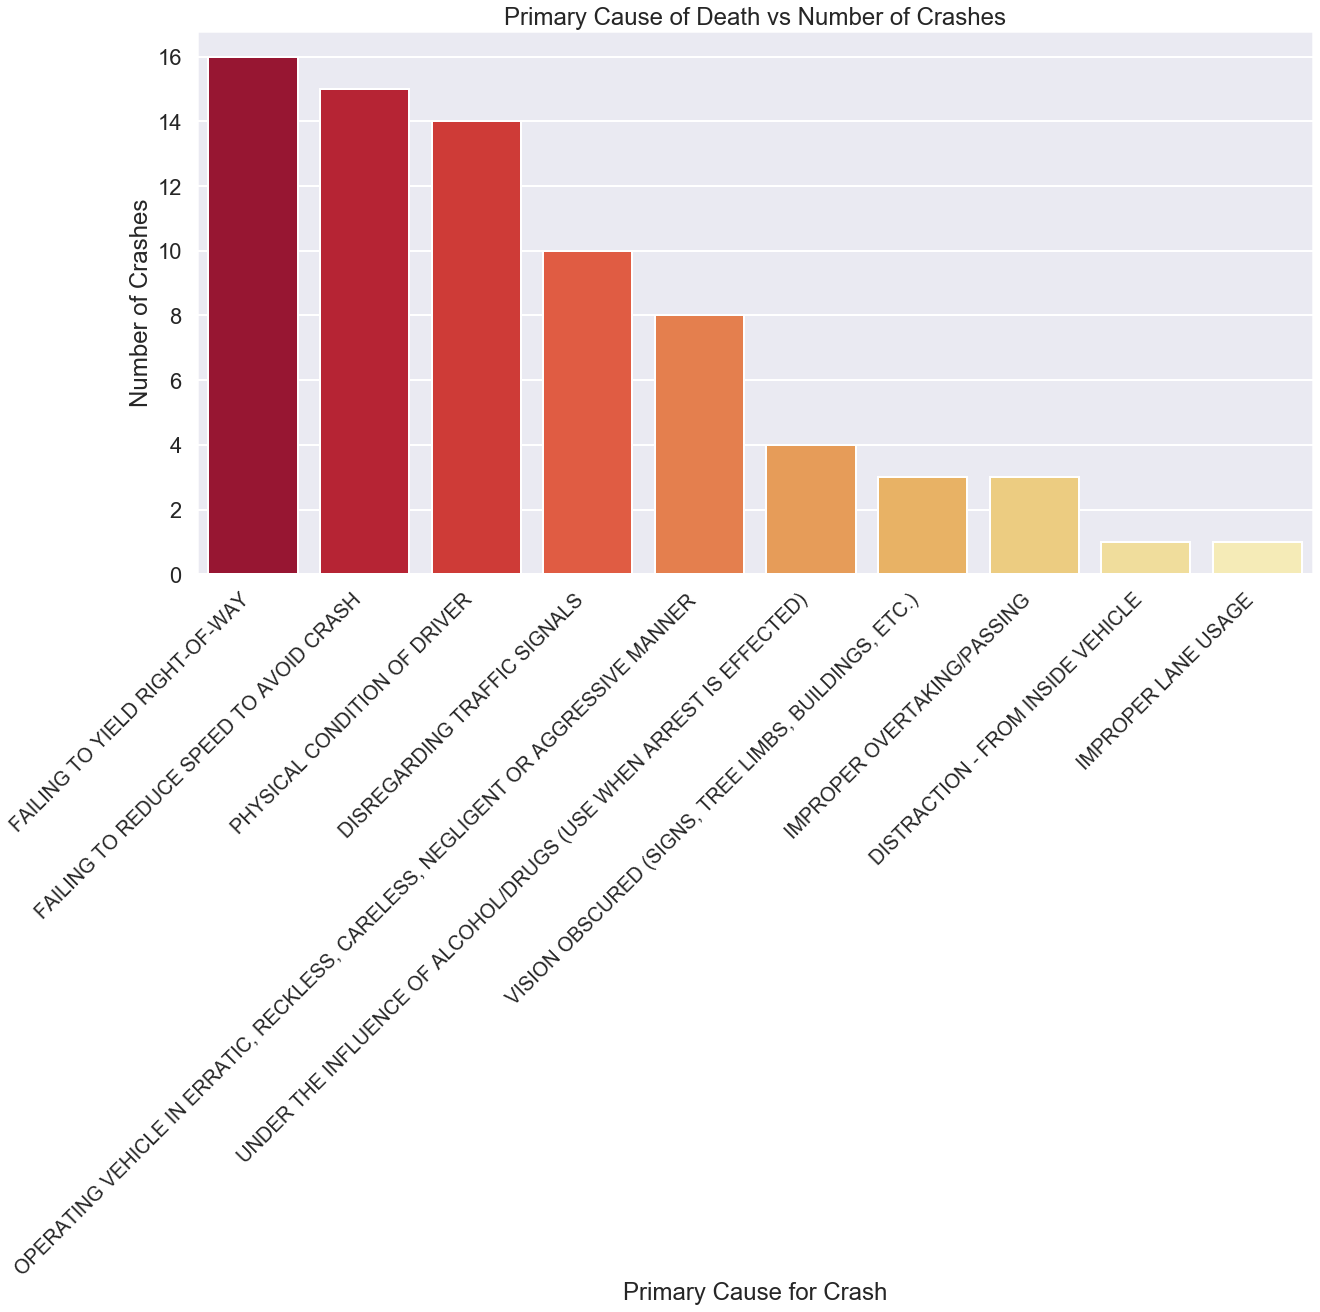

In [97]:
sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize =(20,10))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='small'  
)

ax = sns.countplot(x="PRIM_CONTRIBUTORY_CAUSE", data=fatal,order = fatal['PRIM_CONTRIBUTORY_CAUSE'].value_counts().head(10).index, palette = 'YlOrRd_r')
plt.xlabel('Primary Cause for Crash')
plt.ylabel('Number of Crashes')
plt.title('Primary Cause of Death vs Number of Crashes')
plt.show()

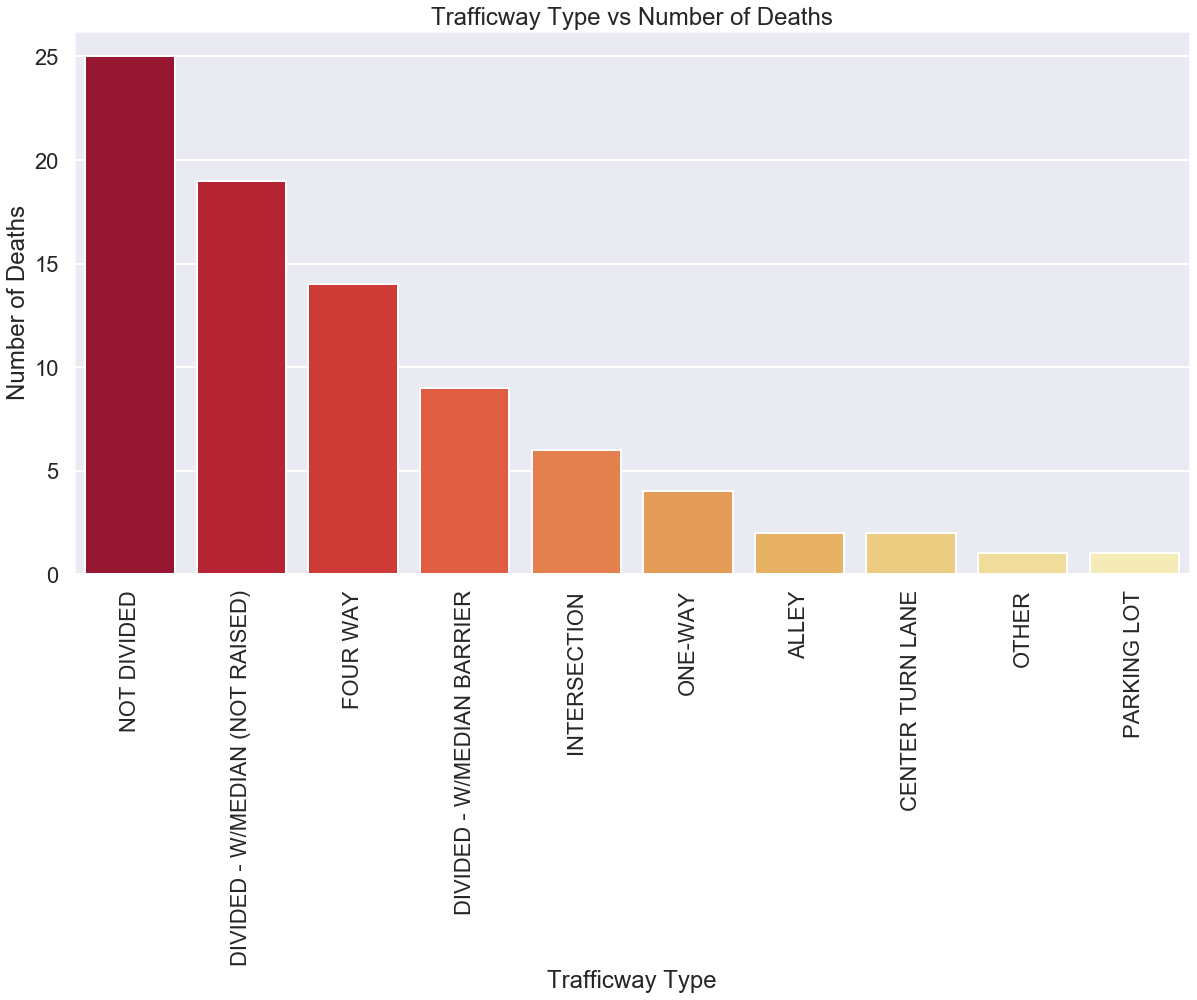

In [98]:
plt.figure(figsize =(20,10))
plt.xticks(rotation=90)

ax = sns.countplot(x="TRAFFICWAY_TYPE", data=fatal,order = fatal['TRAFFICWAY_TYPE'].value_counts().index, palette = 'YlOrRd_r')
plt.xlabel('Trafficway Type')
plt.ylabel('Number of Deaths')
plt.title('Trafficway Type vs Number of Deaths')
plt.show()

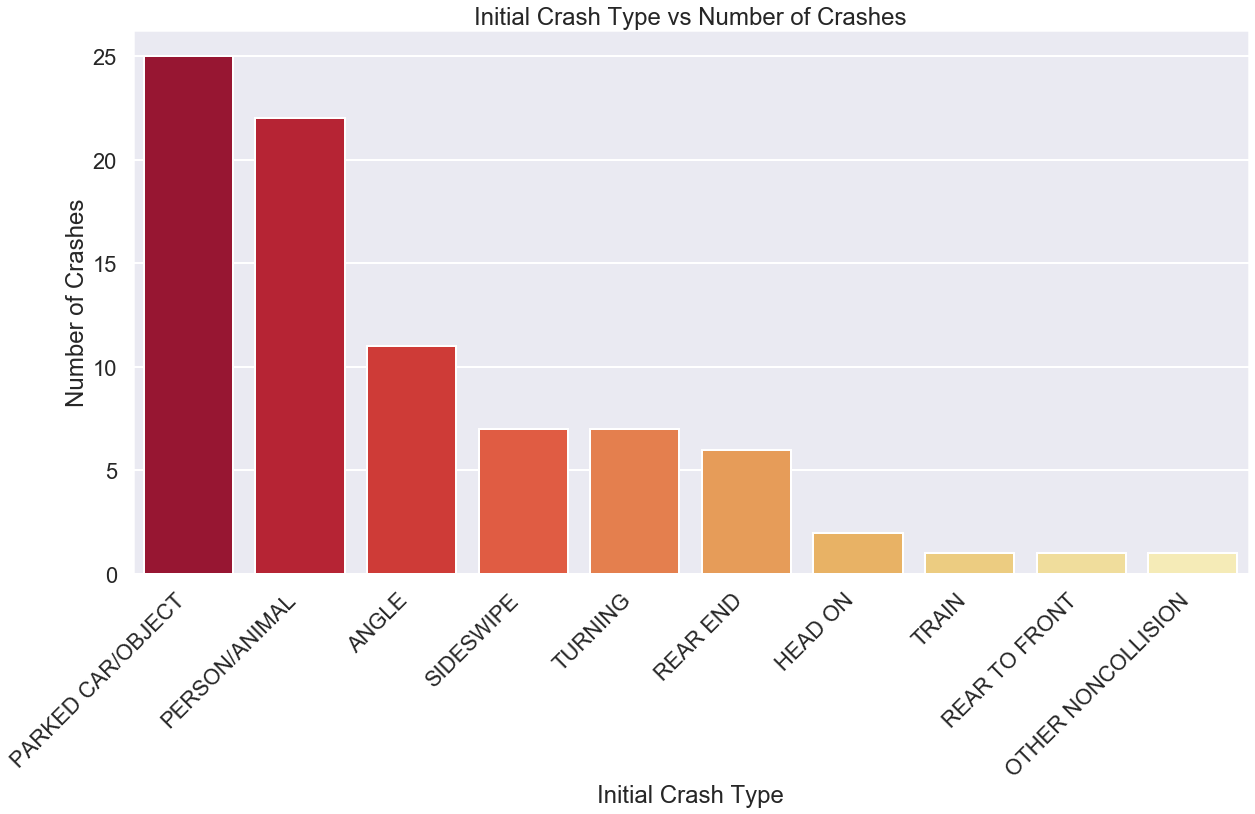

In [99]:
plt.figure(figsize =(20,10))
plt.xticks(rotation=45, horizontalalignment='right')

ax = sns.countplot(x="FIRST_CRASH_TYPE", data=fatal, order = fatal['FIRST_CRASH_TYPE'].value_counts().index, palette = 'YlOrRd_r')
plt.xlabel('Initial Crash Type')
plt.ylabel('Number of Crashes')
plt.title('Initial Crash Type vs Number of Crashes')
plt.show()

In [100]:
injury_crashes = cat_dataframe[cat_dataframe['MOST_SEVERE_INJURY'] != 'NO INJURY']
injury_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11481 entries, 13 to 111347
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CRASH_RECORD_ID           11481 non-null  object 
 1   RD_NO                     11481 non-null  object 
 2   CRASH_DATE                11481 non-null  object 
 3   POSTED_SPEED_LIMIT        11481 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE    11481 non-null  object 
 5   DEVICE_CONDITION          11481 non-null  object 
 6   WEATHER_CONDITION         11481 non-null  object 
 7   LIGHTING_CONDITION        11481 non-null  object 
 8   FIRST_CRASH_TYPE          11481 non-null  object 
 9   TRAFFICWAY_TYPE           11481 non-null  object 
 10  ROAD_DEFECT               11481 non-null  int64  
 11  INTERSECTION_RELATED_I    11481 non-null  int64  
 12  NOT_RIGHT_OF_WAY_I        11481 non-null  int64  
 13  HIT_AND_RUN_I             11481 non-null  int64  
 14  PRIM

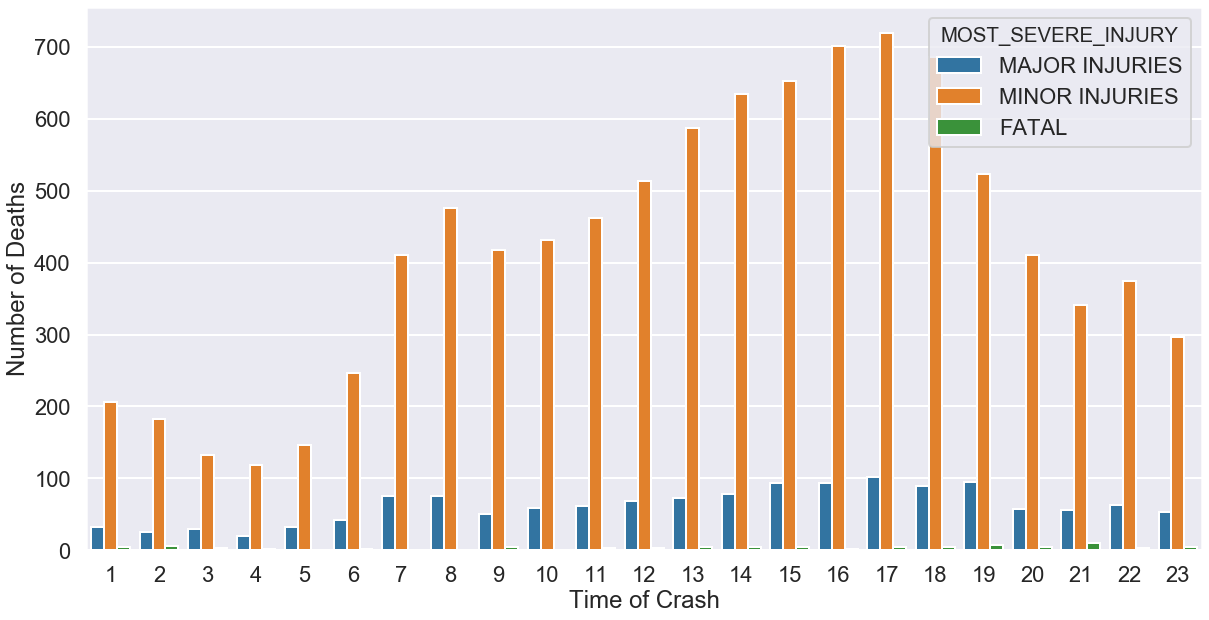

In [101]:
plt.figure(figsize =(20,10))
ax = sns.countplot(x="CRASH_HOUR", hue = 'MOST_SEVERE_INJURY',data=injury_crashes,order = range(1,24))
plt.xlabel('Time of Crash')
plt.ylabel('Number of Deaths')
plt.show()

There are two noticeable "peaks" regarding the number of minor injury crashes. The peaks are between 6-9 am and between 3-6 pm. This is in line with the amount of traffic that would occur from citizen commuting to and from work. The quantity of cars out on the road will result in more crashes than average.

In [102]:
major_injury_crashes = cat_dataframe[(cat_dataframe['MOST_SEVERE_INJURY'] != 'NO INJURY') & (cat_dataframe['MOST_SEVERE_INJURY'] != 'MINOR INJURIES')]
major_injury_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1554 entries, 13 to 111347
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CRASH_RECORD_ID           1554 non-null   object 
 1   RD_NO                     1554 non-null   object 
 2   CRASH_DATE                1554 non-null   object 
 3   POSTED_SPEED_LIMIT        1554 non-null   int64  
 4   TRAFFIC_CONTROL_DEVICE    1554 non-null   object 
 5   DEVICE_CONDITION          1554 non-null   object 
 6   WEATHER_CONDITION         1554 non-null   object 
 7   LIGHTING_CONDITION        1554 non-null   object 
 8   FIRST_CRASH_TYPE          1554 non-null   object 
 9   TRAFFICWAY_TYPE           1554 non-null   object 
 10  ROAD_DEFECT               1554 non-null   int64  
 11  INTERSECTION_RELATED_I    1554 non-null   int64  
 12  NOT_RIGHT_OF_WAY_I        1554 non-null   int64  
 13  HIT_AND_RUN_I             1554 non-null   int64  
 14  PRIM_

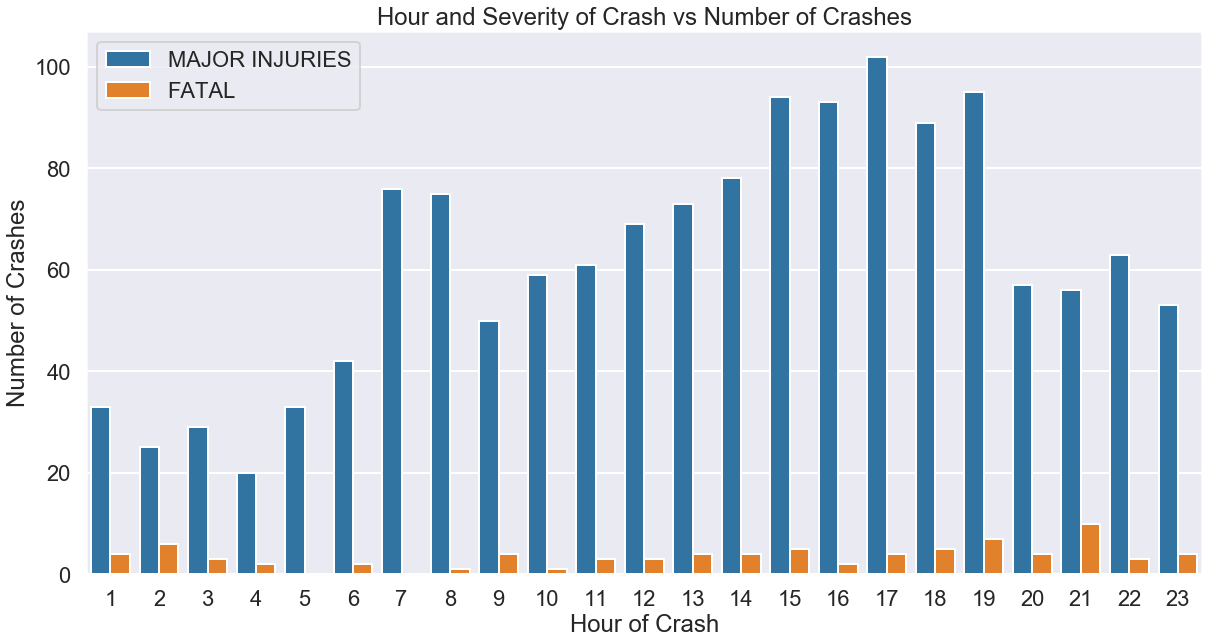

In [116]:
plt.figure(figsize =(20,10))
ax = sns.countplot(x="CRASH_HOUR", hue = 'MOST_SEVERE_INJURY',data=major_injury_crashes,order = range(1,24))
plt.xlabel('Hour of Crash')
plt.ylabel('Number of Crashes')
plt.title('Hour and Severity of Crash vs Number of Crashes')
plt.legend(loc = 'upper left')
plt.show()

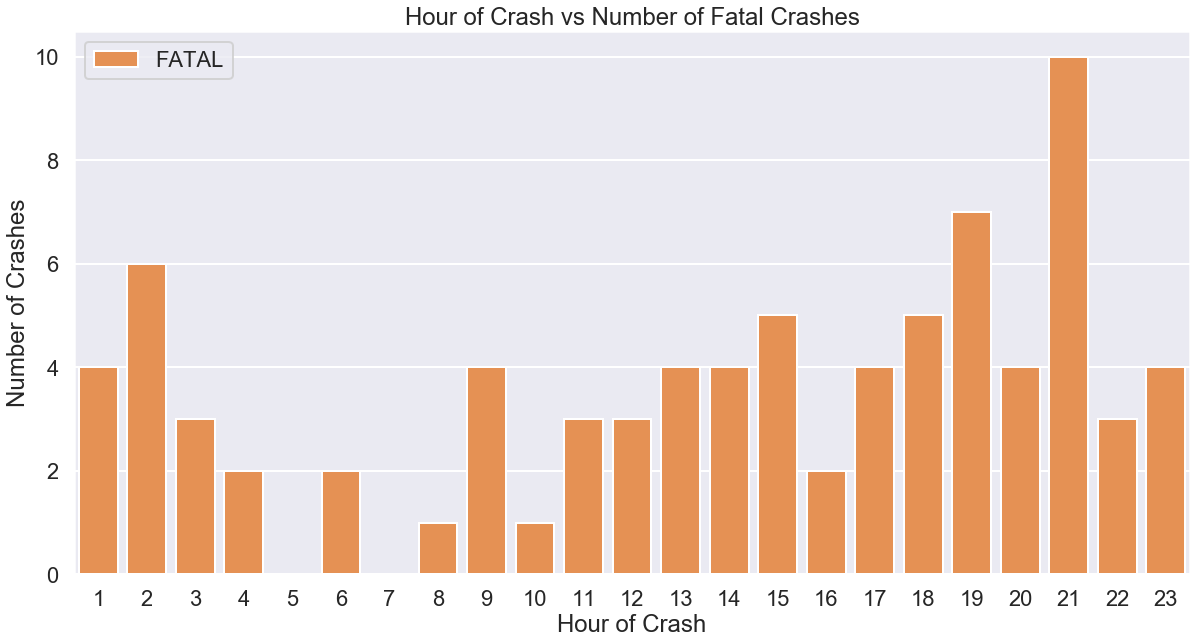

In [114]:
plt.figure(figsize =(20,10))
ax = sns.countplot(x="CRASH_HOUR",hue = 'MOST_SEVERE_INJURY',data=fatal,order = range(1,24), palette = 'YlOrRd_r')

plt.xlabel('Hour of Crash')
plt.ylabel('Number of Crashes')
plt.title('Hour of Crash vs Number of Fatal Crashes')
plt.legend(loc = 'upper left')
plt.show()

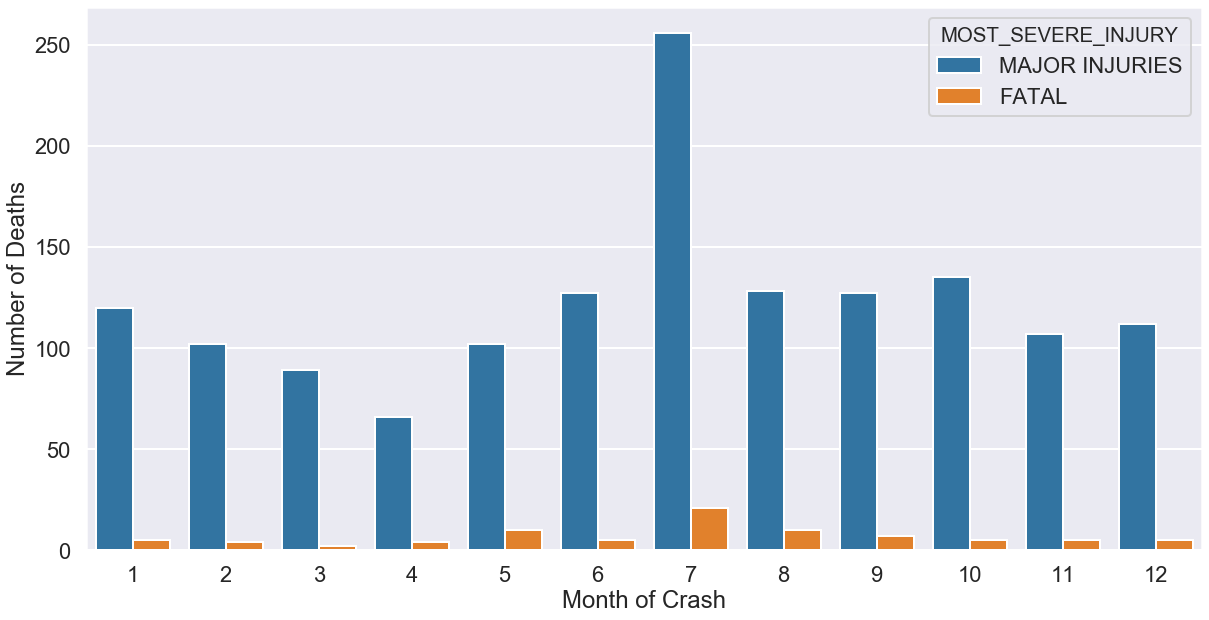

In [105]:
plt.figure(figsize =(20,10))
ax = sns.countplot(x="CRASH_MONTH", hue = 'MOST_SEVERE_INJURY',data=major_injury_crashes,order = range(1,13))
plt.xlabel('Month of Crash')
plt.ylabel('Number of Deaths')
plt.show()

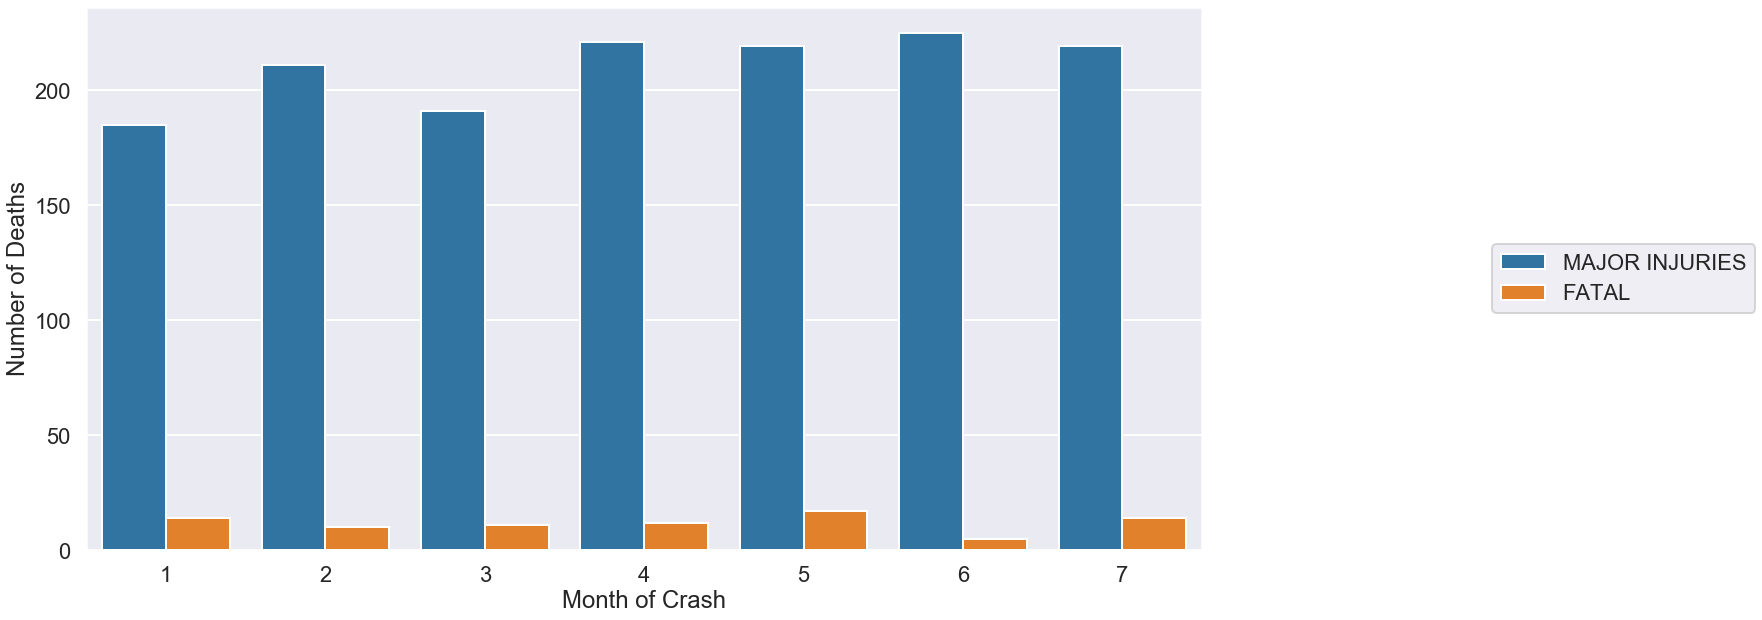

In [106]:
plt.figure(figsize =(20,10))
ax = sns.countplot(x="CRASH_DAY_OF_WEEK", hue = 'MOST_SEVERE_INJURY',data=major_injury_crashes,order = range(1,8))
plt.xlabel('Month of Crash')
plt.ylabel('Number of Deaths')
plt.legend(fancybox=True,loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

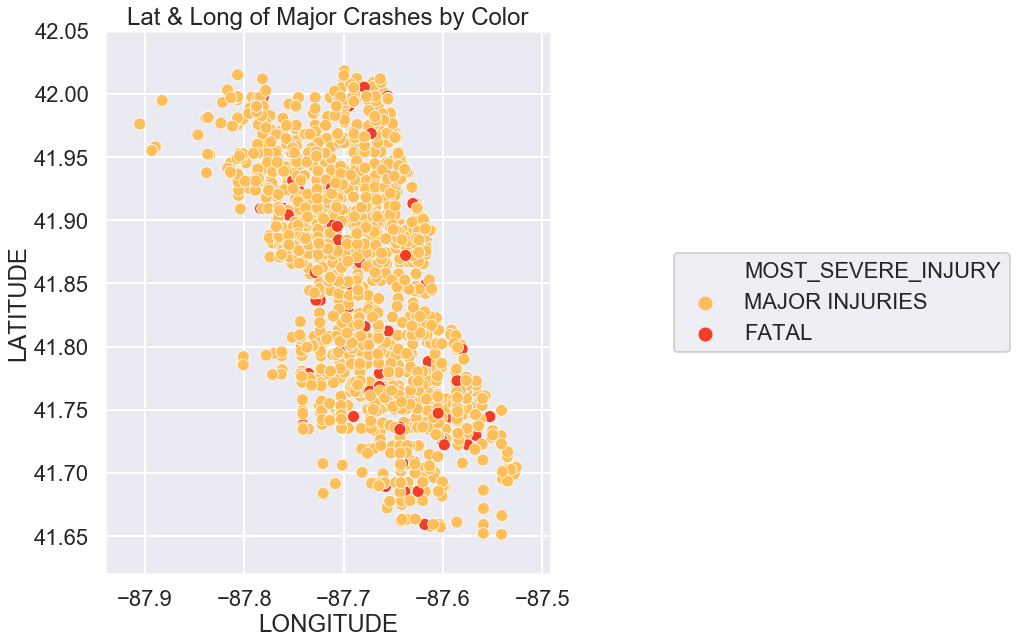

In [107]:
plt.figure(figsize=(8,10))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='MOST_SEVERE_INJURY', data=major_injury_crashes, palette='YlOrRd')
plt.title('Lat & Long of Major Crashes by Color')
plt.legend(fancybox=True,loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);

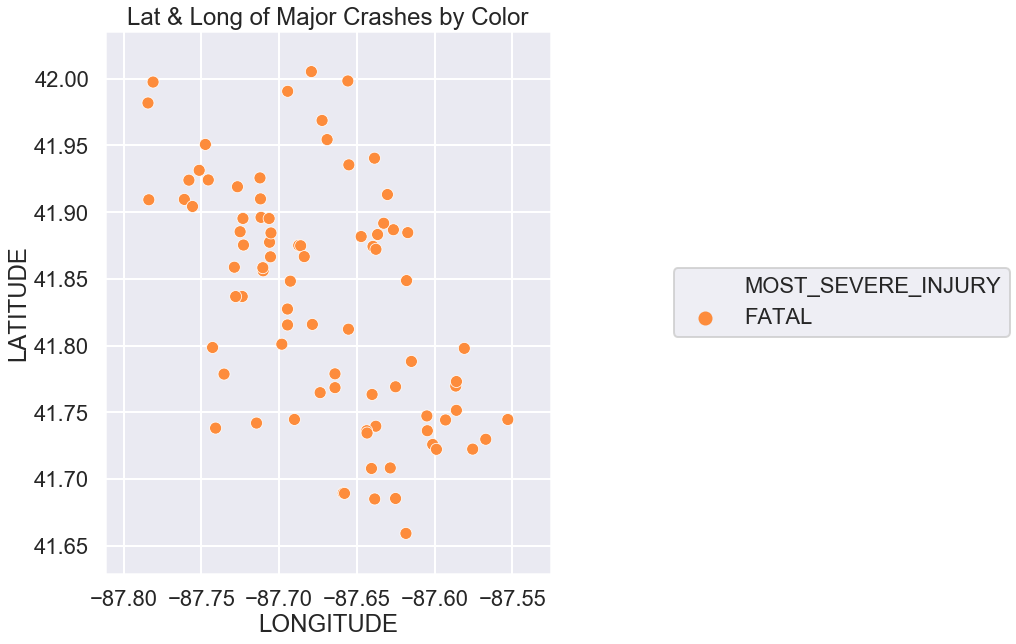

In [108]:
plt.figure(figsize=(8,10))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='MOST_SEVERE_INJURY', data=fatal, palette='YlOrRd')
plt.title('Lat & Long of Major Crashes by Color')
plt.legend(fancybox=True,loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);

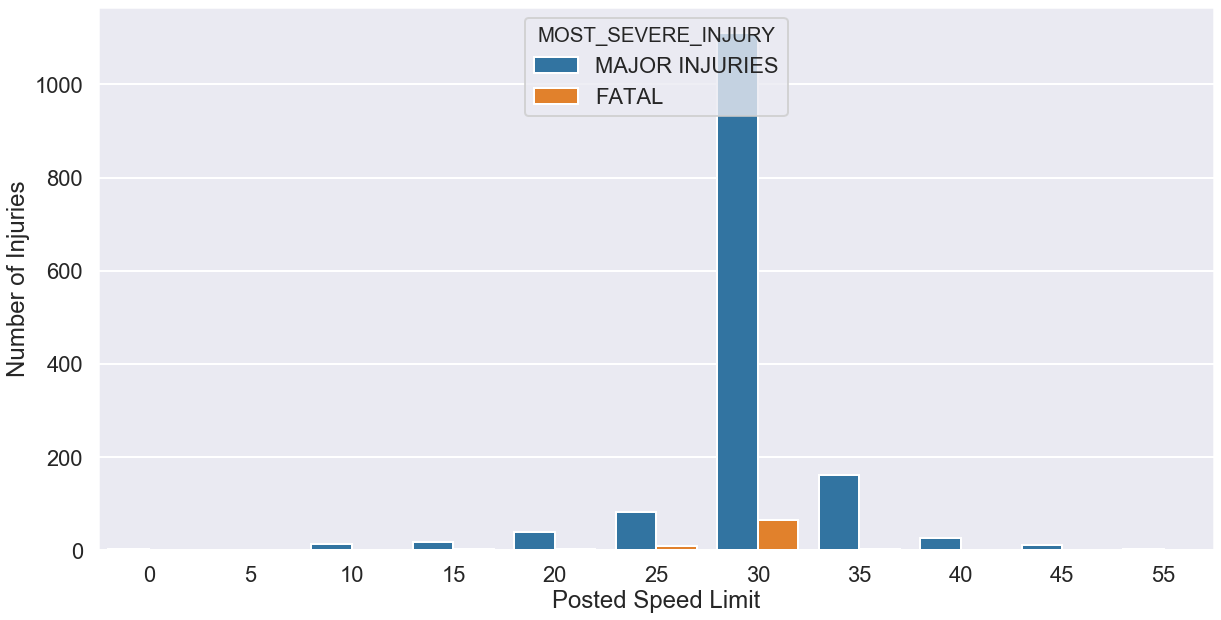

In [109]:
plt.figure(figsize =(20,10))
ax = sns.countplot(x="POSTED_SPEED_LIMIT", hue = 'MOST_SEVERE_INJURY',data=major_injury_crashes)
plt.xlabel('Posted Speed Limit')
plt.ylabel('Number of Injuries')
plt.show()

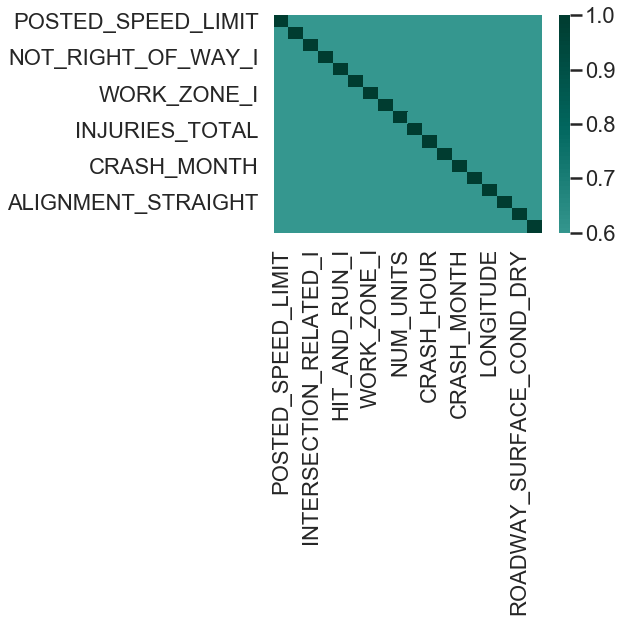

In [110]:
sns.heatmap(primary_classify.corr(), center=0, cmap='BrBG',vmin = 0.60)

# Exporting cleaned data for modeling

In [111]:
primary_classify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63768 entries, 4 to 111348
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CRASH_RECORD_ID           63768 non-null  object 
 1   POSTED_SPEED_LIMIT        63768 non-null  int64  
 2   TRAFFIC_CONTROL_DEVICE    63768 non-null  object 
 3   DEVICE_CONDITION          63768 non-null  object 
 4   WEATHER_CONDITION         63768 non-null  object 
 5   LIGHTING_CONDITION        63768 non-null  object 
 6   FIRST_CRASH_TYPE          63768 non-null  object 
 7   TRAFFICWAY_TYPE           63768 non-null  object 
 8   ROAD_DEFECT               63768 non-null  int64  
 9   INTERSECTION_RELATED_I    63768 non-null  int64  
 10  NOT_RIGHT_OF_WAY_I        63768 non-null  int64  
 11  HIT_AND_RUN_I             63768 non-null  int64  
 12  PRIM_CONTRIBUTORY_CAUSE   63768 non-null  object 
 13  DOORING_I                 63768 non-null  int64  
 14  WORK_

In [112]:
primary_classify.to_csv('chicago_cleaned_dataset', index = False)